# Mid-bootcamp project - Regression

In [692]:
# Importamos las librerias que vamos a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
from scipy.stats import norm
from scipy import stats 
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

In [693]:
# Creamos una variable con la ruta del archivo
archivo = 'regression_data.xls'

# Cargamos el archivo Excel en un DataFrame
regression_data = pd.read_excel(archivo)

# Realizamos una copia de seguridad
df= regression_data.copy()


In [694]:
# Observamos la cantidad de columnas y filas que tiene el data base
df.shape

(21597, 21)

In [695]:
# Consultamos la información contenida
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

### Descripción de las columnas 

* Id: Unique identification number for the property
* date: the date the house was sold
* price: the price of the house
* waterfront: the house which has a view to a waterfront
* condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
* grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
* Sqft_above: square footage of house apart from the basement
* Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
* Sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [696]:
# Visualizamos si el DataFrame tiene valores nulos

null_counts = df.isnull().sum()
print(null_counts)

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [697]:
# Extraemos el mes y el año en columnas separadas
df['mes'] = df['date'].dt.month
df['anio'] = df['date'].dt.year

In [698]:
# Lista con los nombres de las columnas
lista_columnas = df.columns.tolist()

print(lista_columnas)

['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'mes', 'anio']


In [699]:
# Ordenamos columnas 
column_order = ['id', 'date', 'mes', 'anio', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']

# Reordenar las columnas utilizando reindex()
df = df.reindex(columns=column_order)

In [700]:
# Lista de columnas de interés
columnas_interes = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade' ]

# Obtengo el número de valores únicos para cada columna
for columna in columnas_interes:
    conteo_valores = df[columna].value_counts()
    print(columna)
    print(conteo_valores)
    print()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

bathrooms
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

floors
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

waterfront
0    21434
1      163
Name: waterfront, dtype: int64

view
0    19475
2      961
3      510
1      332
4      319
Name: view, dtype: int64

condition
3    14020
4     5677
5     1701
2      170
1       29
Name: condition, dtype: int64

grade
7     8974
8     6065
9     2615
6     2038
1

In [701]:
# Luego de realizado el análisis de las principales variables vemos que existen propiedades con mas de 9 habitaciones, vamos a seleccionarlas para analizarlas en profundidad.add()

# Propiedades con mas de 9 habitaciones
x = 9

# Seleccionar los valores mayores a x en la columna 'bedrooms'
resultado = df[df['bedrooms'] > x]
resultado

,id,date,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
8748,1773100755,2014-08-21,8,2014,11,3.00,3000,4960,2.0,0,...,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960,520000
13301,627300145,2014-08-14,8,2014,10,5.25,4590,10920,1.0,0,...,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400,1150000
15147,5566100170,2014-10-29,10,2014,10,2.00,3610,11914,2.0,0,...,3010,600,1958,0,98006,47.5705,-122.175,2040,11914,650000
15856,2402100895,2014-06-25,6,2014,33,1.75,1620,6000,1.0,0,...,1040,580,1947,0,98103,47.6878,-122.331,1330,4700,640000
19239,8812401450,2014-12-29,12,2014,10,3.00,2920,3745,2.0,0,...,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745,660000


In [702]:
# Para el caso de la propiedad que tiene 33 habitaciones no existe coherencia por lo tanto la eliminamos

df = df.drop(df[df['bedrooms'] == 33].index)

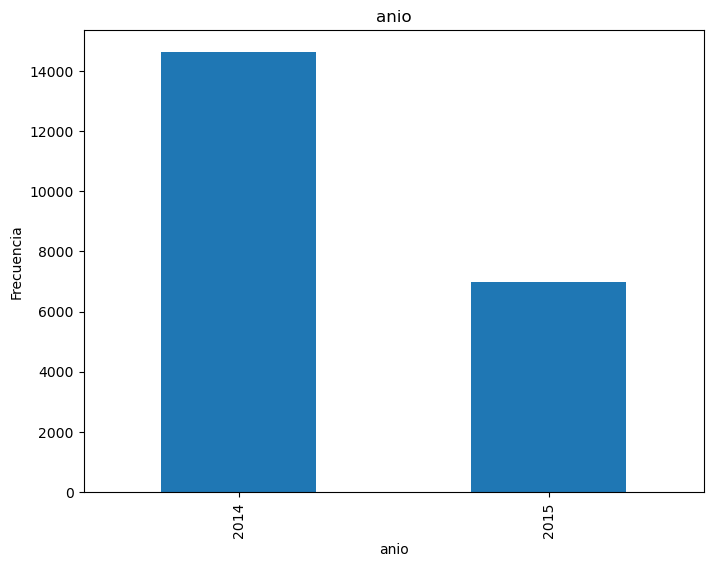

In [703]:
# Para conocer como se encuentra distribuida la base temporalmente selecciono la columna de año
columna = 'anio'

# Creo un gráfico de barras
df[columna].value_counts().plot(kind='bar', figsize=(8,6))

# Personalizo el gráfico
plt.title('anio')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostro el gráfico
plt.show()

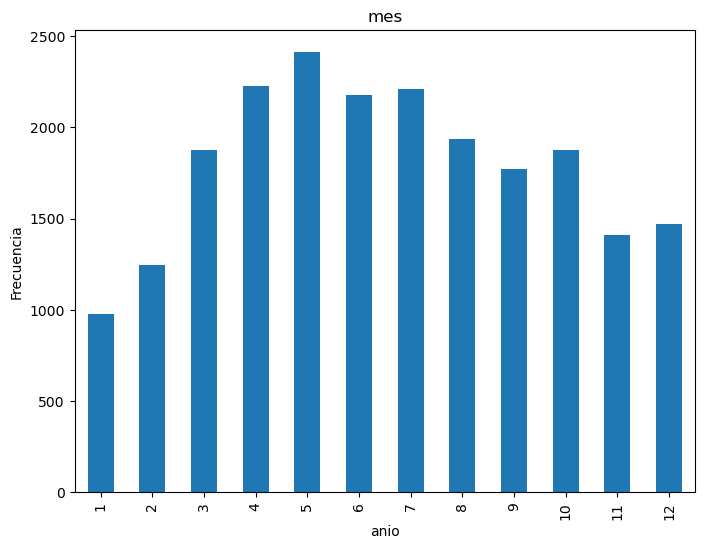

In [704]:
# Realizo el mismo ejercicio para el mes

# Obtengo los valores únicos y ordenarlos
valores_unicos_ordenados = sorted(df['mes'].unique())

# Creo un gráfico de barras ordenado por los valores únicos
df['mes'].value_counts().reindex(valores_unicos_ordenados).plot(kind='bar', figsize=(8, 6))

# Personalizo el gráfico
plt.title('mes')
plt.xlabel(columna)
plt.ylabel('Frecuencia')

# Mostro el gráfico
plt.show()

In [705]:
# Elimino la columna 'date' ya que no aporta valor al análisis.
df = df.drop(columns=['date'])

In [706]:
# Verificamos si la columna 'id' tiene valores duplicados

duplicados = df.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
df_duplicados = df[duplicados]

df_duplicados

# Vemos que existen varias transacciones de una misma propiedad


,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,7,2014,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,430000
94,6021501535,12,2014,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
313,4139480200,6,2014,4,3.25,4290,12103,1.0,0,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1380000
314,4139480200,12,2014,4,3.25,4290,12103,1.0,0,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
324,7520000520,9,2014,2,1.00,1240,12092,1.0,0,0,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,232000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3,2015,4,2.50,2680,5539,2.0,0,0,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20763,6300000226,6,2014,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,240000
20764,6300000226,5,2015,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000
21564,7853420110,10,2014,3,3.00,2780,6000,2.0,0,0,...,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,594866


In [707]:
"""Como vemos que existen mas de una transaccion con el mismo ID, por nos quedamos con la ultima transacción ya que no disponemos de conocimiento
para el tratamiento de variables temporales y considero fundamentelaes para realizar un buen analisis de las transacciones."""

# Elimino duplicados en la columna 'id' y quedo con el último valor
df = df.drop_duplicates(subset=['id'], keep='last')

In [708]:
# Verificamos que no existan filas duplicadas
filas_duplicadas = df.duplicated(keep=False)

# Filtramos DataFrame
df_filas_duplicadas = df[filas_duplicadas]

df_filas_duplicadas


,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [709]:
df.shape

(21419, 22)

In [710]:
# Verificamos nuevamente si la columna 'id' tiene valores duplicados

duplicados = df.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
df_duplicados = df[duplicados]

df_duplicados

# Vemos que existen varias transacciones de una misma propiedad

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [711]:
# Realizo un resumen estadístico que proporciona información útil sobre las estadísticas descriptivas de los datos, lo que permite obtener una visión general rápida de las principales propiedades de las características numéricas en el conjunto de datos
df.describe()

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.141900e+04,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04,21419.000000,21419.000000,21419.000000,...,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,21419.000000,2.141900e+04
mean,4.581042e+09,6.564032,2014.325272,3.372566,2.118446,2083.154256,1.512846e+04,1.496008,0.007610,0.235118,...,1791.205285,291.948971,1971.094122,84.797049,98077.873197,47.560191,-122.213778,1988.414819,12776.095196,5.418568e+05
std,2.876790e+09,3.117916,0.468487,0.903013,0.768734,918.824411,4.153172e+04,0.540083,0.086905,0.767182,...,828.696414,442.881467,29.387365,402.583607,53.478453,0.138590,0.140792,685.538299,27346.204562,3.675649e+05
min,1.000102e+06,1.000000,2014.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123375e+09,4.000000,2014.000000,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,...,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000,3.249500e+05
50%,3.904921e+09,6.000000,2014.000000,3.000000,2.250000,1920.000000,7.614000e+03,1.500000,0.000000,0.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572100,-122.230000,1840.000000,7620.000000,4.505000e+05
75%,7.308900e+09,9.000000,2015.000000,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,...,2220.000000,560.000000,1997.000000,0.000000,98117.000000,47.678050,-122.125000,2370.000000,10086.500000,6.450000e+05
max,9.900000e+09,12.000000,2015.000000,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


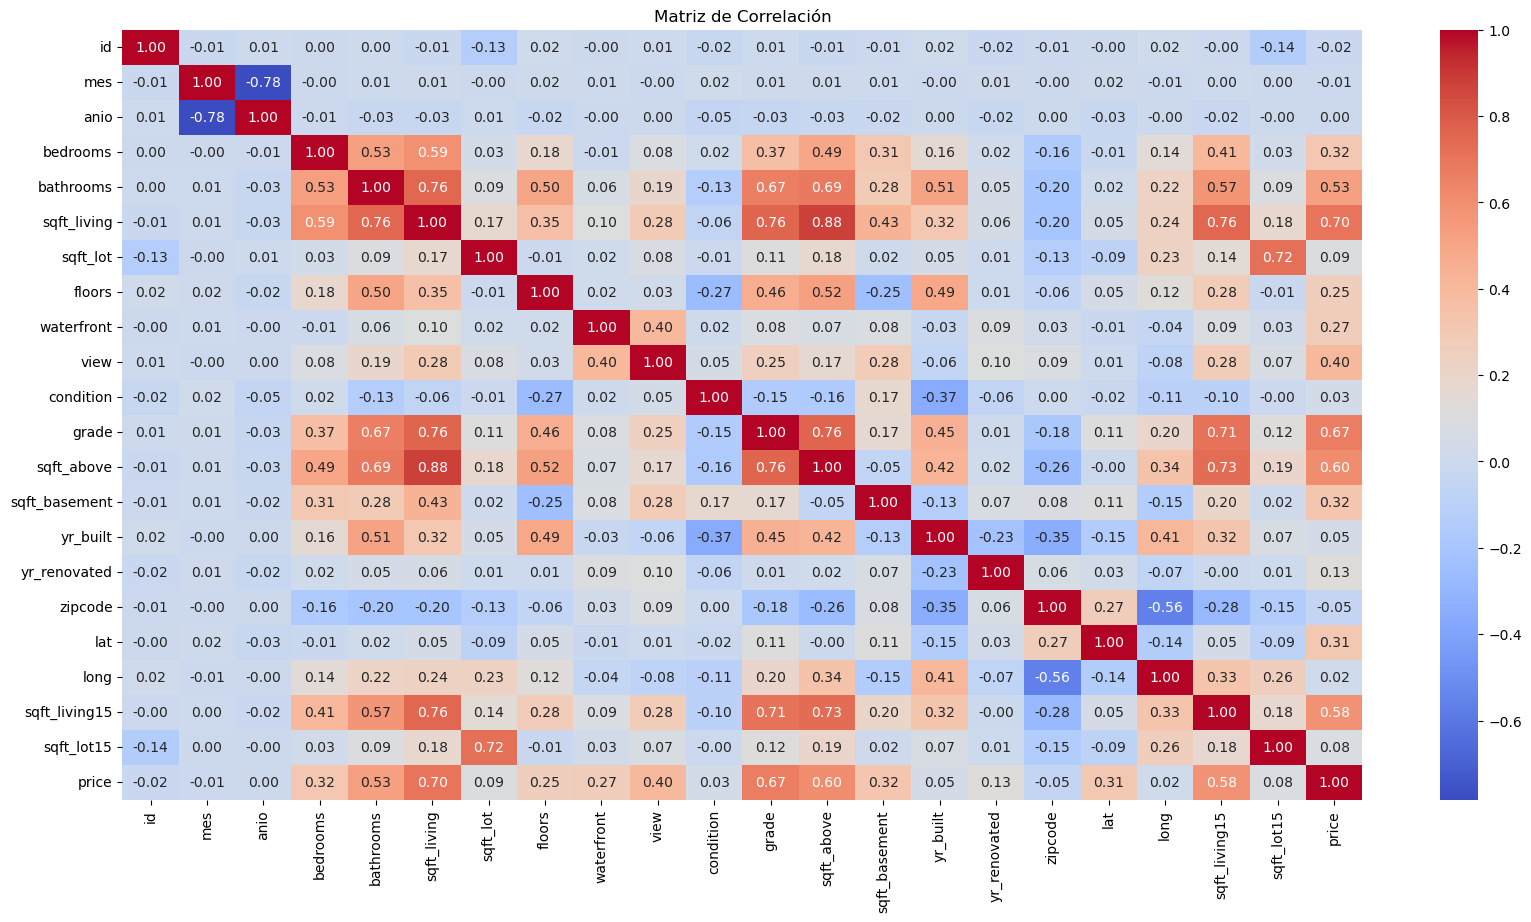

In [712]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


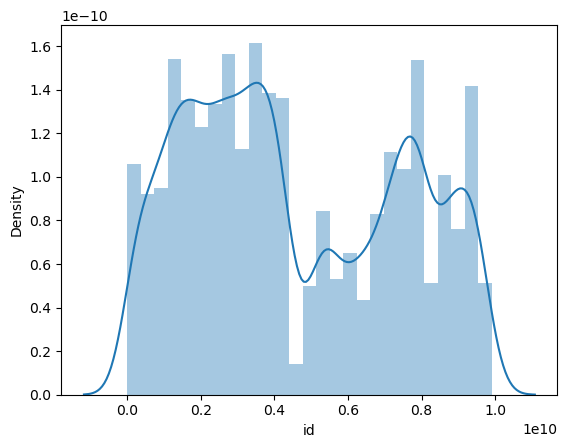

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


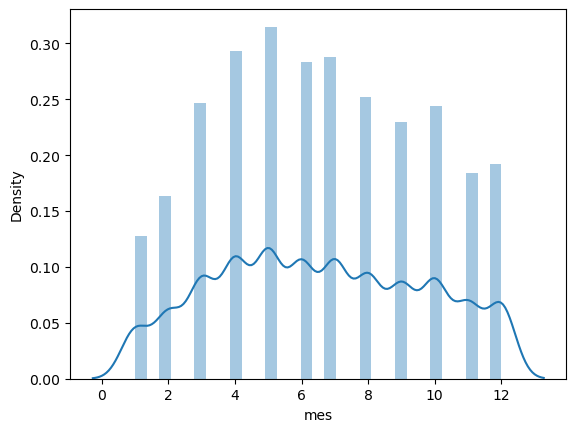

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


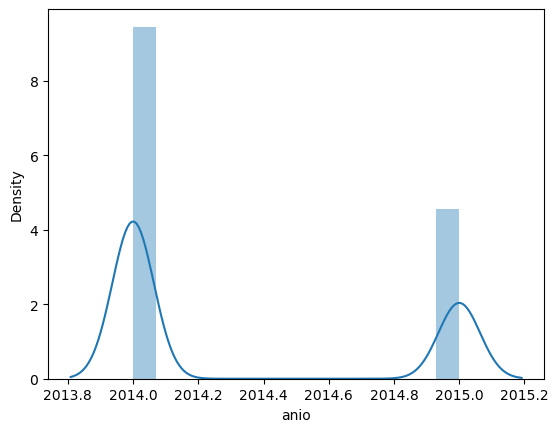

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


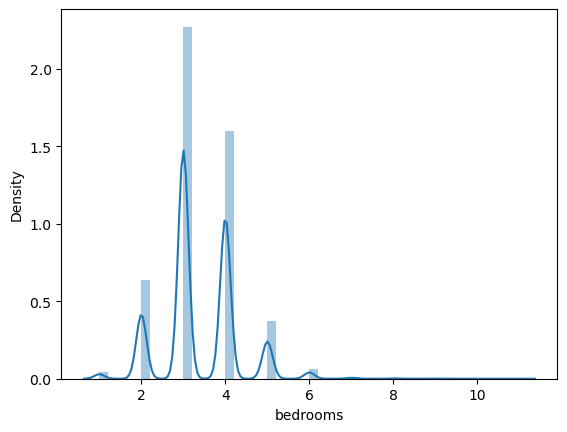

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


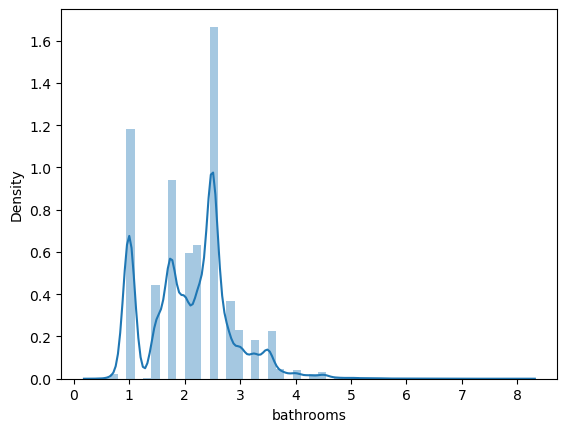

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


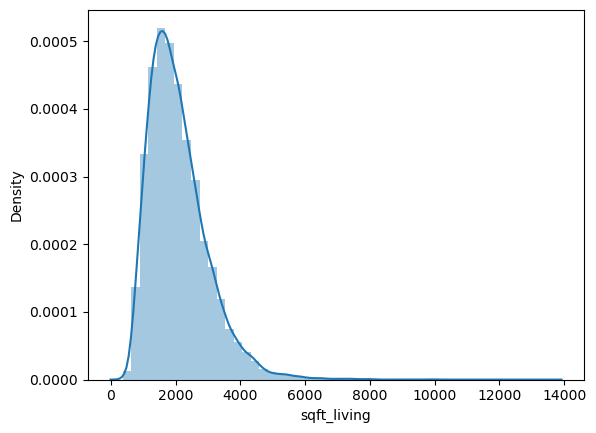

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


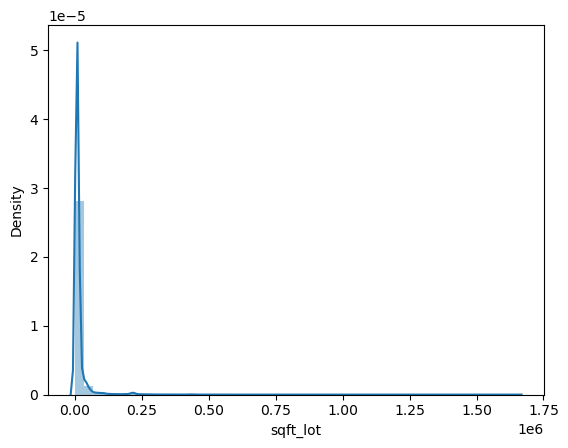

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


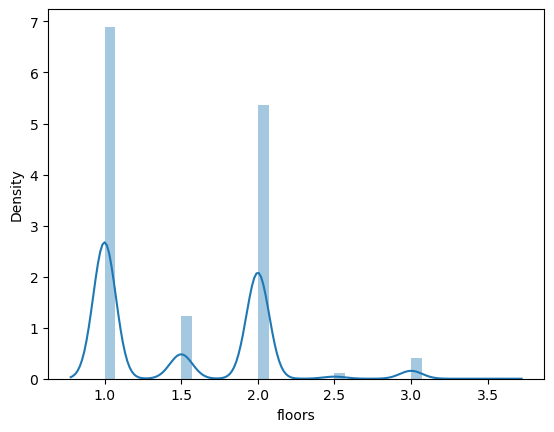

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


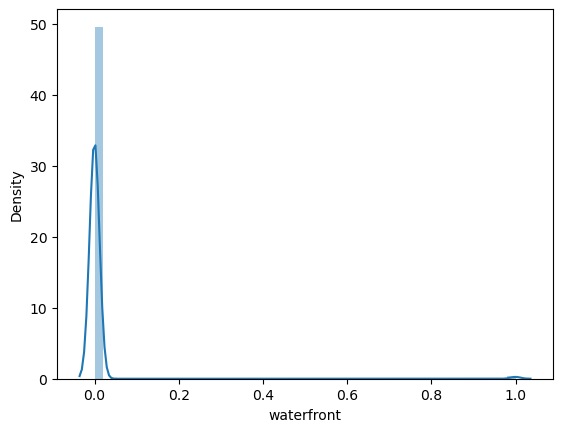

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


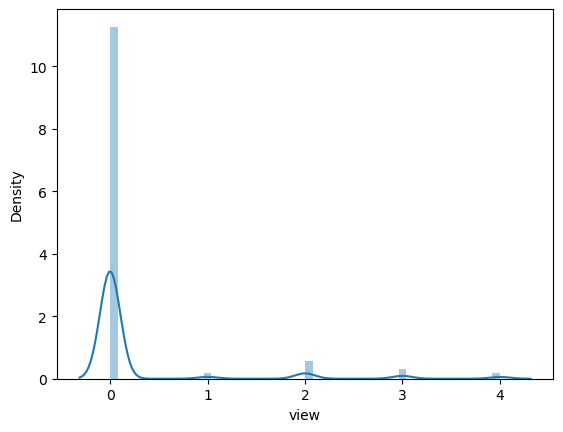

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


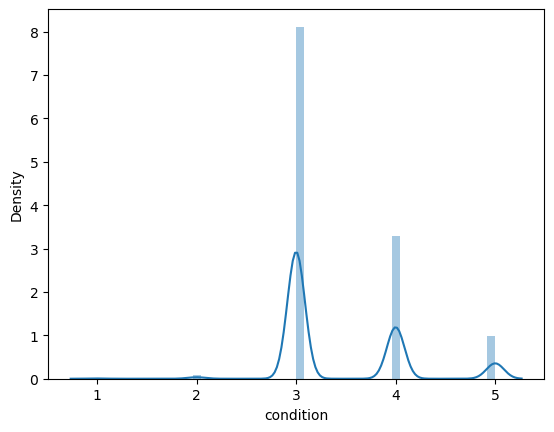

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


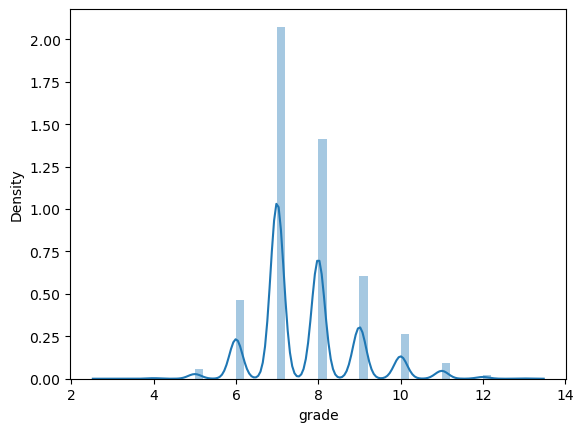

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


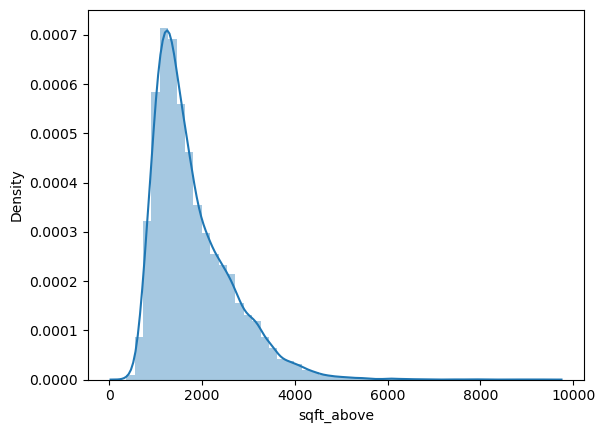

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


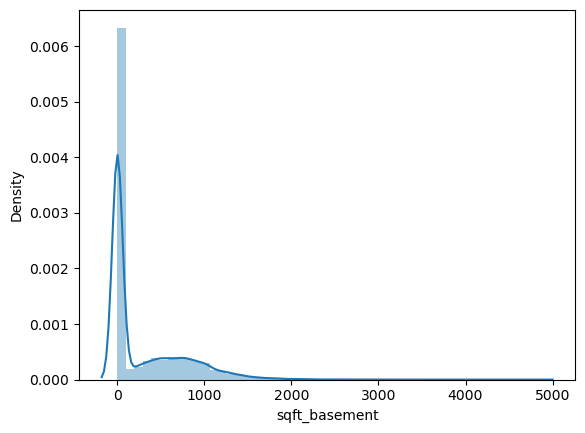

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


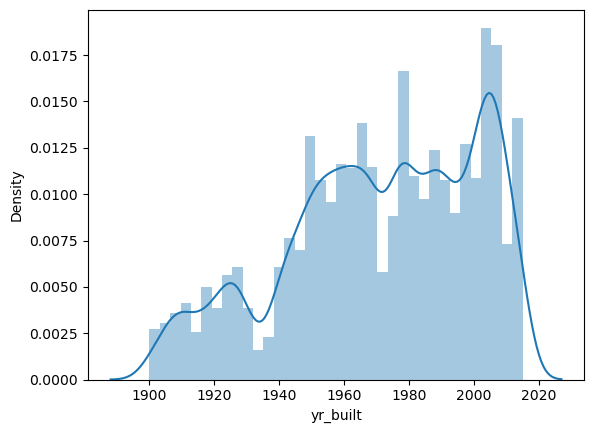

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


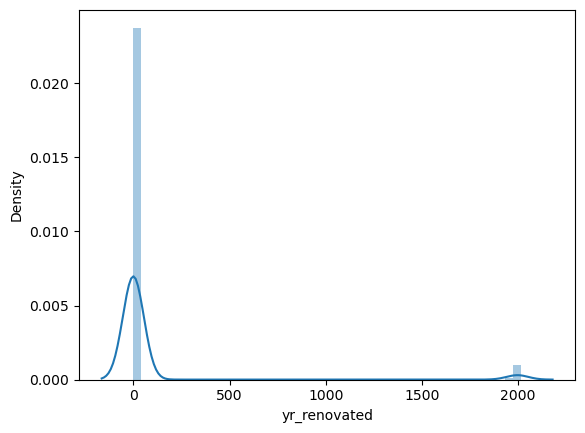

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


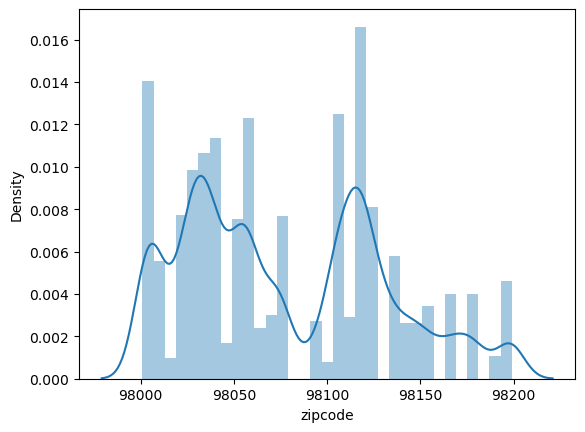

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


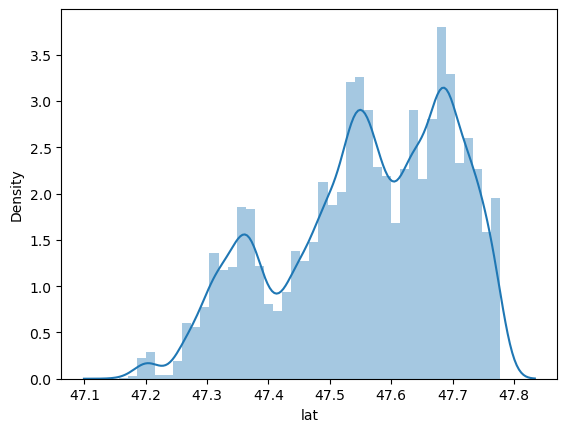

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


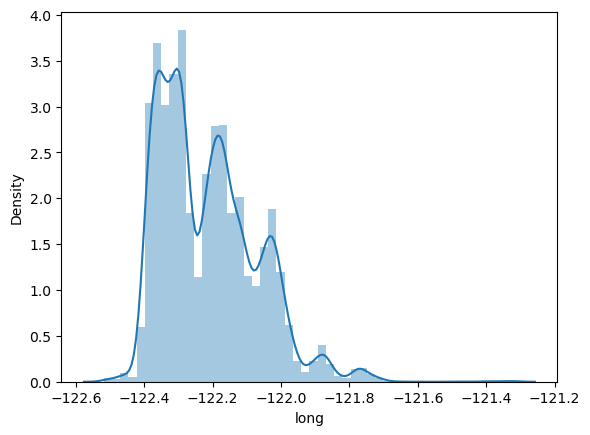

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


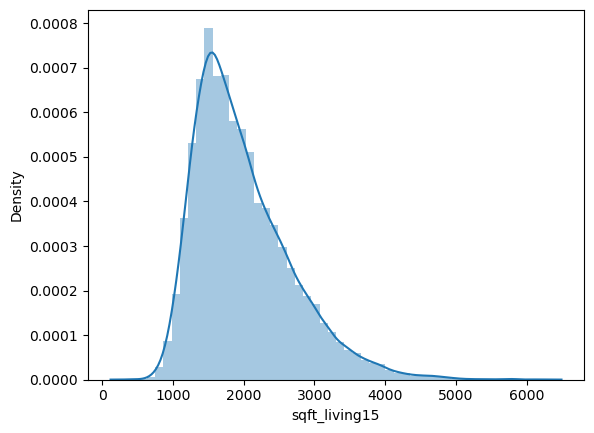

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


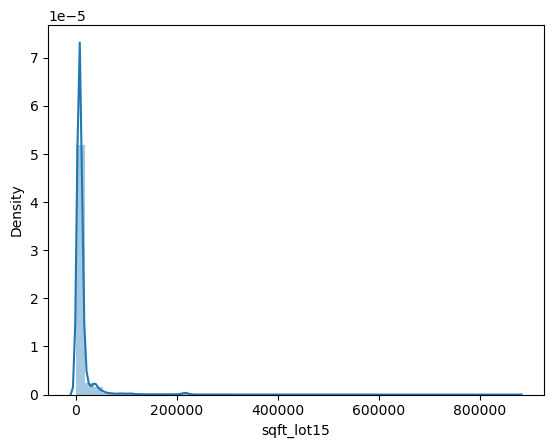

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


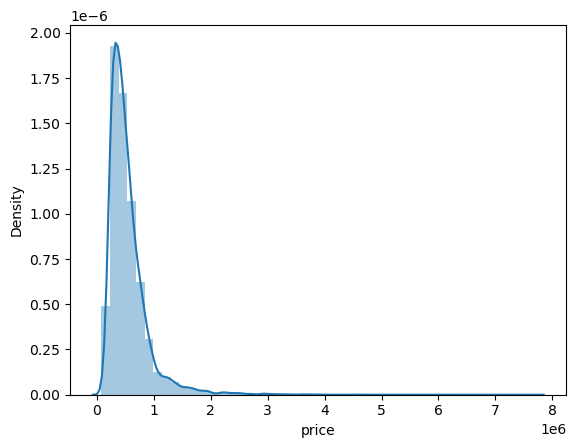

In [713]:
# Creo un gráficos de distribución (histogramas y estimaciones de densidad) para cada columna numérica en este caso todas las de DataFrame

for columns in df.columns:
    sns.distplot(df[columns])
    plt.show()

### Procedemos al modelización de DataFrame con las variables y valores que tienen, probando de esta forma cuatro modelos:

1. **OLS**: método estadístico utilizado en análisis de regresión para encontrar la mejor línea de ajuste a un conjunto de datos. El objetivo es minimizar la suma de los cuadrados de las diferencias entre los valores reales y los valores predichos.

2. **Regresión Lineal**: modelo predictivo que busca establecer una relación lineal entre una variable dependiente y una o más variables independientes. La idea es encontrar una ecuación de una línea recta que mejor se ajuste a los datos y permita hacer predicciones sobre la variable dependiente basándose en los valores de las variables independientes.

3. **KNN**: algoritmo de aprendizaje automático supervisado que se utiliza tanto para clasificación como para regresión. Funciona asignando etiquetas o estimando valores a un punto de datos basándose en las etiquetas o valores de sus vecinos más cercanos. "K" se refiere al número de vecinos más cercanos que se toman en cuenta para tomar una decisión.

4. **MLP**:  red neuronal artificial que consta de múltiples capas de neuronas interconectadas. Cada neurona en una capa está conectada con las neuronas de la capa anterior y de la siguiente.




In [714]:
# Creamos una funcion con un test_size variable para ver como performa el modelo con distintos tamaños

def regression_metrics(df, target_column):
    test_sizes=[0.4, 0.3, 0.2, 0.1]
    
    X = df.drop([target_column], axis=1)
    Y = df[target_column]
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    print(model.summary())
    for size in test_sizes:  
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size, random_state=42)
        lm = LinearRegression()
        model = lm.fit(X_train, y_train)
        predictions = lm.predict(X_test)
        
        mse = mean_squared_error(y_test, predictions)
        print(f"Test size: {size}, MSE: {mse}")
        
        rmse = math.sqrt(mse)
        print(f"Test size: {size}, RMSE: {rmse}")
        
        r2 = r2_score(y_test, predictions)
        print(f"Test size: {size}, R2: {r2}")
        
        n = len(X_test)
        p = X_test.shape[1]
        adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
        print(f"Test size: {size}, Adjusted R2: {adj_r2}")
        print("----------------------------------")

- OLS
- Regresión Lineal

In [715]:
# Ejecutamos la funcion para el DataFrame (df) 

regression_metrics(df, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2520.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:05   Log-Likelihood:            -2.9191e+05
No. Observations:               21419   AIC:                         5.839e+05
Df Residuals:                   21398   BIC:                         5.840e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.724e+07   9.98e+06     -6.740

- KNeighborsRegressor

- MLPRegressor

In [716]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Supongamos que tienes los datos X e Y ya definidos

# Elimino la columna 'price' del DataFrame df para obtener X (características) y guardar 'price' en Y (variable objetivo)
X = df.drop(['price'], axis=1)
Y = df['price']

# Añado una columna constante (intercept) para el modelo de regresión lineal
X = sm.add_constant(X)

# Defino una función para entrenar y evaluar varios modelos de regresión
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        
        # Entreno el modelo
        model.fit(X_train, y_train)
        
        # Realizo predicciones en el conjunto de prueba
        predictions = model.predict(X_test)
        
        # Calculo el Error Cuadrático Medio (MSE)
        mse = mean_squared_error(y_test, predictions)
        
        # Calculo el coeficiente R-cuadrado (R-squared)
        r2 = r2_score(y_test, predictions)
        
        # Almaceno los resultados
        results[model_name] = {
            'MSE': mse,
            'R-squared': r2
        }
    
    return results

# Defino una función para entrenar y evaluar múltiples modelos de regresión
def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    
    # Entreno y evaluo los modelos utilizando la función previamente definida
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)
    
    # Imprimo los resultados para cada modelo
    for model_name, metrics in results.items():
        print(f"Model: {model_name}")
        print(f"MSE: {metrics['MSE']}")
        print(f"R-squared: {metrics['R-squared']}")
        print("---------------------------------------")

# Modelos de regresión a utilizar
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

# Divido los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entreno y evaluo los modelos utilizando la función definida
train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)


Model: KNN
MSE: 72928068245.27629
R-squared: 0.4071790828068794
---------------------------------------
Model: MLP
MSE: 818255184046.7726
R-squared: -5.651469048558722
---------------------------------------


Continuando con el proceso de análisis de datos, revisamos nuevamente la matriz de correlación y encontramos una correlación significativa entre las variables "sqft_above" y "sqft_living15", así como entre "sqft_above" y "sqft_lot15". Estos resultados indican una estrecha relación entre las dimensiones o áreas de estas características.

Asimismo, hemos identificado una correlación entre las variables "mes" y "año", dada la naturaleza temporal de dos años de los datos. En vista de esta correlación y para evitar problemas de multicolinealidad en los modelos, hemos tomado la decisión de eliminar la variable "año" del conjunto de características.

In [717]:
# Copio el DataFrame para mantener el original y trabajar sobre la copia
df2= df.copy()



# Elimino las varibles analizadas
df2 = df2.drop(['sqft_living', 'sqft_lot', 'anio'], axis=1)


In [718]:
df2

,id,mes,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


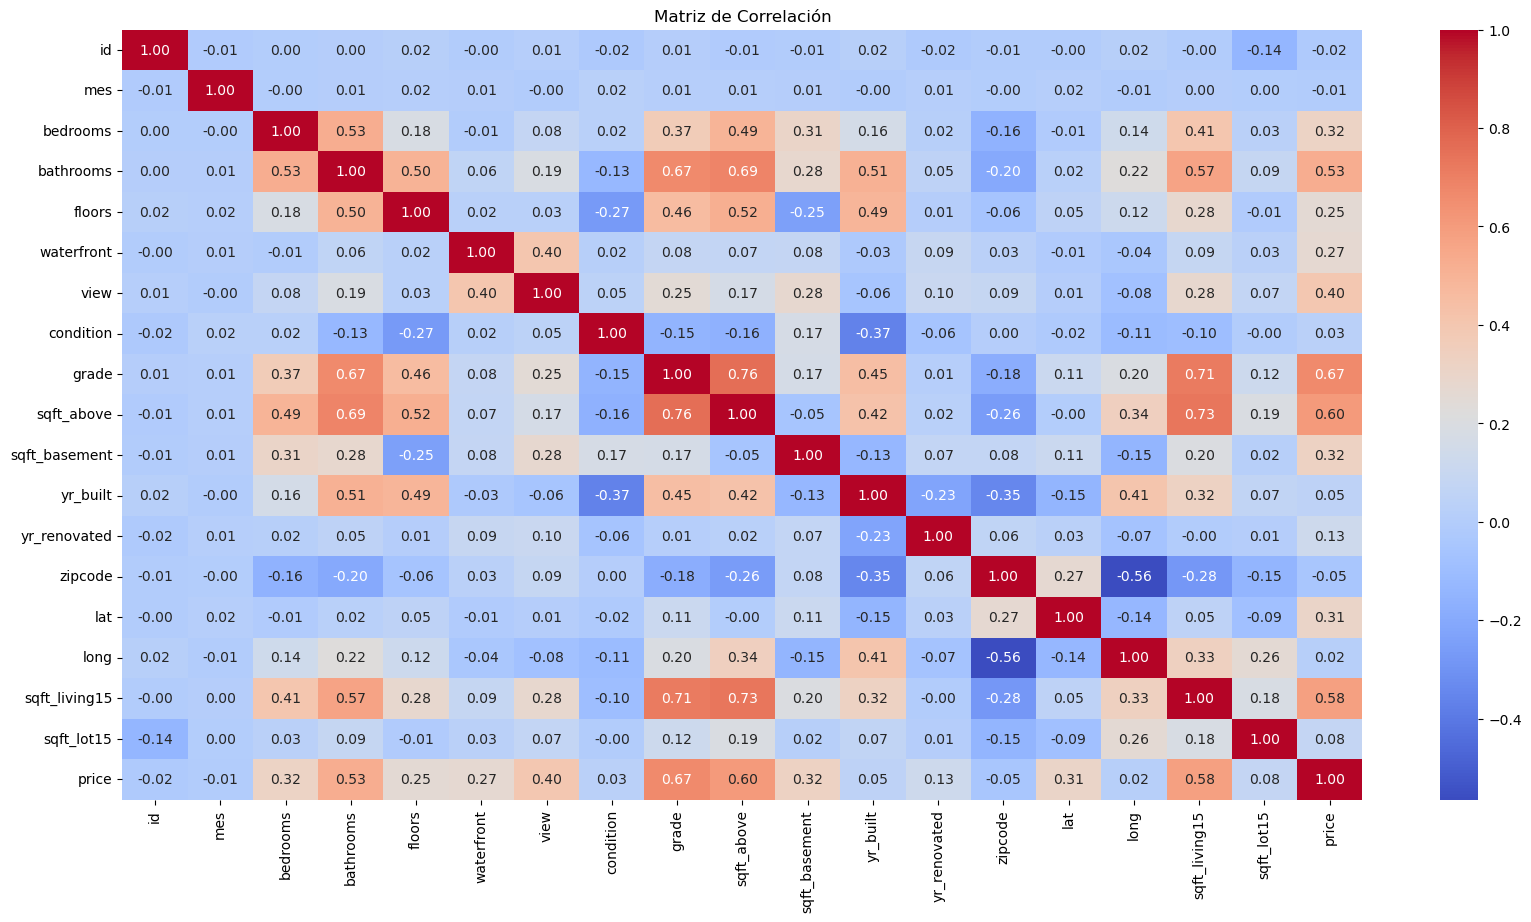

In [719]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df2.corr()

# Ajustamos el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agrego título al heatmap
plt.title('Matriz de Correlación')

# Mostramos el gráfico
plt.show()

In [720]:
# Para las variables de espacialidad opto por mantener el Zipcode de las propiedades

df2 = df2.drop(['lat', 'long'], axis=1)

In [721]:
df2

,id,mes,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
0,7129300520,10,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,221900
1,6414100192,12,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,538000
2,5631500400,2,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,180000
3,2487200875,12,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,604000
4,1954400510,2,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5,3,2.50,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,360000
21593,6600060120,2,4,2.50,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,400000
21594,1523300141,6,2,0.75,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,402101
21595,291310100,1,3,2.50,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,400000


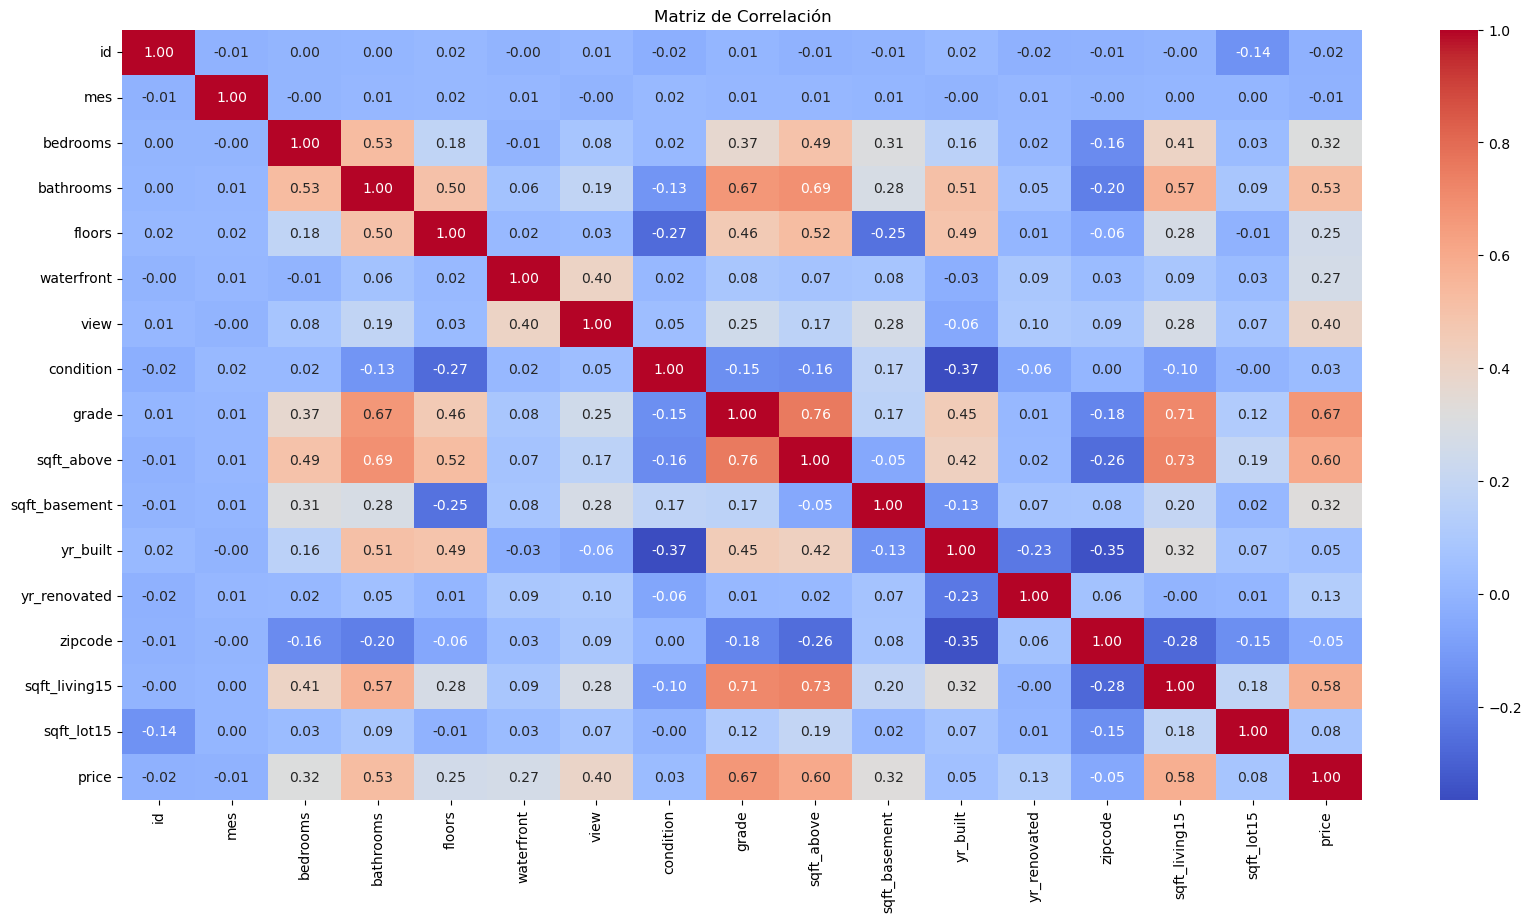

In [722]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df2.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [723]:
# Ejecutamos la funcion para el DataFrame (df2) modificado
regression_metrics(df2, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2542.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:15   Log-Likelihood:            -2.9346e+05
No. Observations:               21419   AIC:                         5.870e+05
Df Residuals:                   21402   BIC:                         5.871e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          7.569e+06   3.14e+06      2.410

KNeighborsRegressor

MLPRegressor

In [724]:
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Evaluate the model's performance
        r2 = r2_score(y_test, predictions)
        
        # Store the results
        results[model_name] = r2
    
    return results

def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)

    # Print the results
    for model_name, r2 in results.items():
        print(f"{model_name}: R2 score = {r2}")

#Modelos
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)

KNN: R2 score = 0.4071790828068794
MLP: R2 score = -7.025468324766205


Hemos observado que eliminar variables con correlaciones significativas entre ellas no ha resultado en una mejora en los modelos; por el contrario, ha sido contraproducente, ya que el rendimiento del modelo se ha visto afectado negativamente.

El siguiente paso en nuestro análisis es utilizar el **VIF** (Factor de Inflación de la Varianza), una medida fundamental en el análisis de regresión para evaluar la multicolinealidad entre las variables independientes.

El VIF nos proporcionará información acerca de la magnitud de la multicolinealidad presente en cada variable. Cuando el VIF de una variable es alto (por encima de cierto umbral, como 5 o 10), indica una fuerte correlación con otras variables, lo que podría afectar negativamente la estabilidad y precisión del modelo.

Para llevar a cabo este análisis, volveremos al DataFrame original df y realizaremos una copia de los datos para trabajar en ella sin modificar los datos originales. Al obtener los valores del VIF para cada variable, podremos identificar aquellas con alta multicolinealidad y tomar decisiones informadas, como la eliminación o transformación de características, con el fin de mejorar la calidad del modelo.

In [725]:
#VARIANCE INFLATION FACTOR:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import cross_val_score

data_corr = df.copy()

data_corr.drop(columns=['price', 'sqft_living'], inplace=True)
vif = {}
data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif

# Existe una combinacion linear entre sqft_above, stqf_basement, sqft_living, es por eso que debemos eliminar una de ellas elegimos sqft_living ya que tiene una varianza mas alta tiene una varianza mas alta 

c:\Users\aguva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


{'const': 0.0,
 'id': 1.0283163281527092,
 'mes': 2.591230762896776,
 'anio': 2.6020809116296983,
 'bedrooms': 1.713920353444516,
 'bathrooms': 3.378217101663134,
 'sqft_lot': 2.103639537679831,
 'floors': 2.012205531458593,
 'waterfront': 1.2058474849613903,
 'view': 1.4385461460637576,
 'condition': 1.2590201320936147,
 'grade': 3.4276226058849333,
 'sqft_above': 4.978303835188362,
 'sqft_basement': 2.030047435175543,
 'yr_built': 2.436886895552543,
 'yr_renovated': 1.1535323714024937,
 'zipcode': 1.6631641359653713,
 'lat': 1.181120604762002,
 'long': 1.8351963127180602,
 'sqft_living15': 2.97738684417599,
 'sqft_lot15': 2.1421110519229822}

In [726]:
# Creamos una copia

df3= df.copy()

In [727]:
#Eliminamos la variable sqft_living, 'id', 'anio'

df3 = df3.drop(['sqft_living', 'id', 'anio', 'sqft_above'], axis=1)

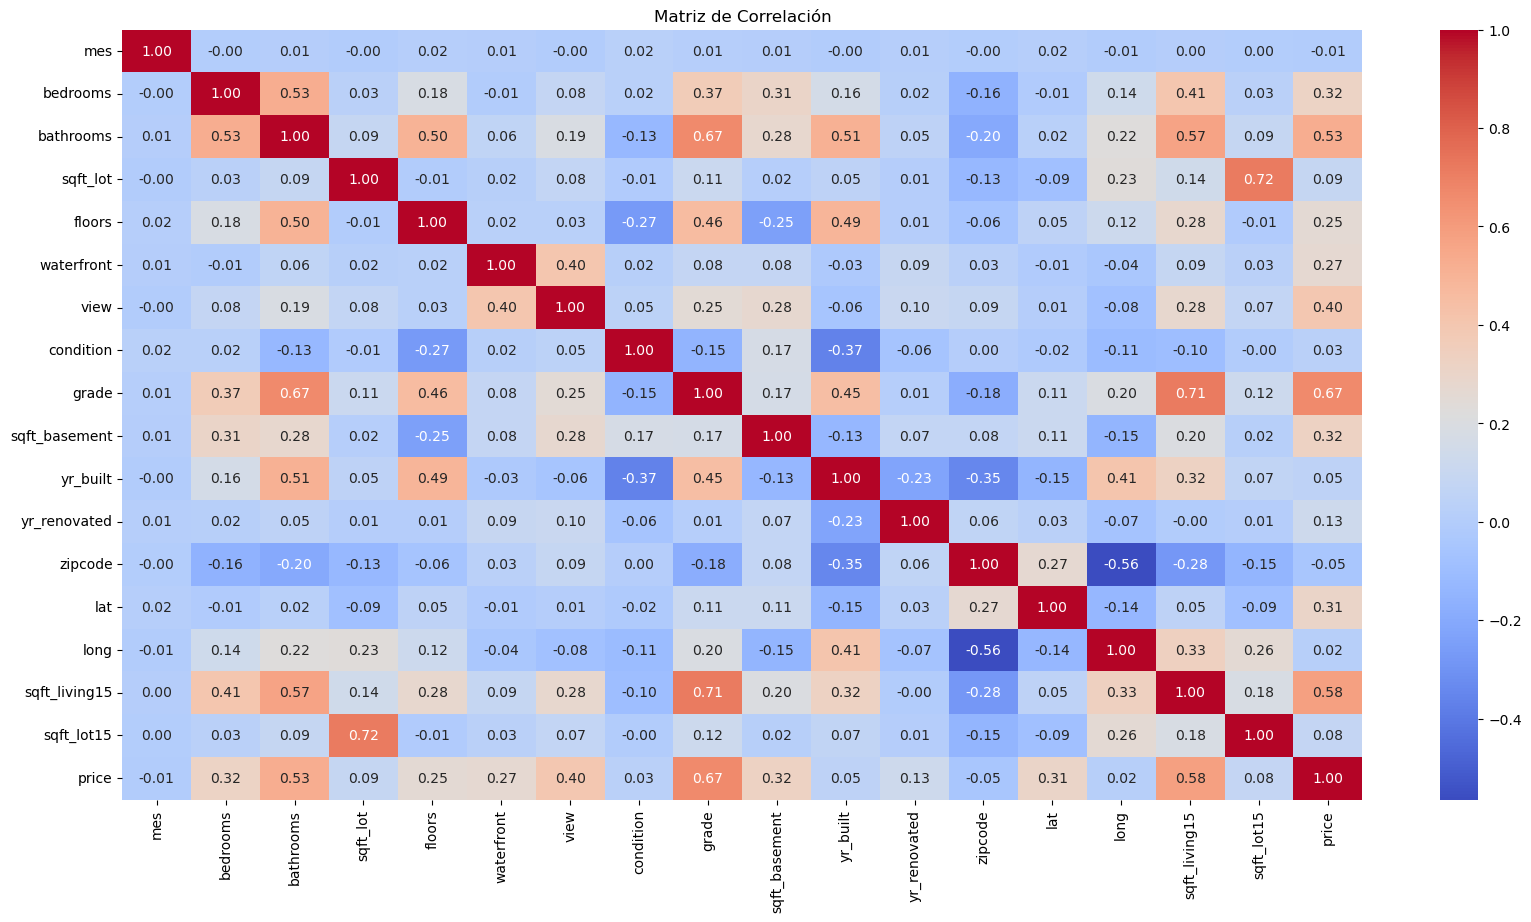

In [728]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df3.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [729]:
# Ejecutamos la funcion para el DataFrame (df2) modificado
regression_metrics(df3, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2518.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:20   Log-Likelihood:            -2.9310e+05
No. Observations:               21419   AIC:                         5.862e+05
Df Residuals:                   21401   BIC:                         5.864e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.393e+07   3.11e+06      4.485

KNeighborsRegressor

MLPRegressor

In [730]:
def train_and_test_models(models, X_train, X_test, y_train, y_test):
    results = {}
    
    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions on the test set
        predictions = model.predict(X_test)
        
        # Evaluate the model's performance
        r2 = r2_score(y_test, predictions)
        
        # Store the results
        results[model_name] = r2
    
    return results

def train_and_test_multiple_models(models, X_train, X_test, y_train, y_test):
    results = train_and_test_models(models, X_train, X_test, y_train, y_test)

    # Print the results
    for model_name, r2 in results.items():
        print(f"{model_name}: R2 score = {r2}")

#Modelos
models = {
    "KNN": KNeighborsRegressor(),
    "MLP": MLPRegressor()
}

train_and_test_multiple_models(models, X_train, X_test, y_train, y_test)

KNN: R2 score = 0.4071790828068794
MLP: R2 score = -1.9942089402492567


Vemos que el último DataFrame es menos optimo.

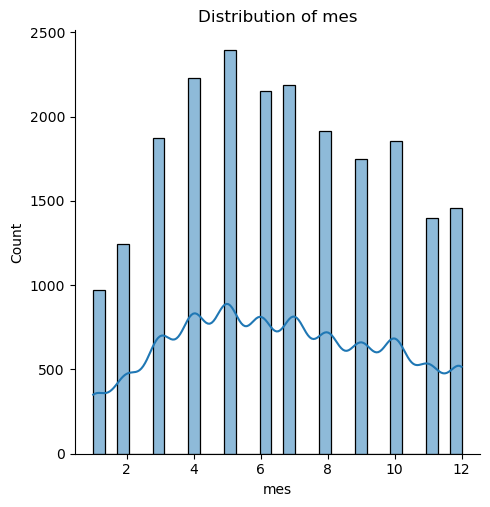

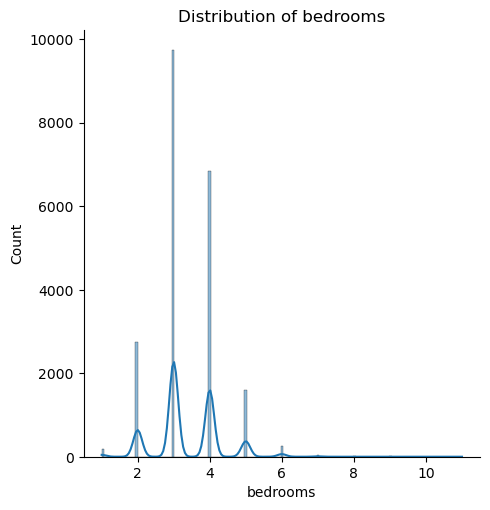

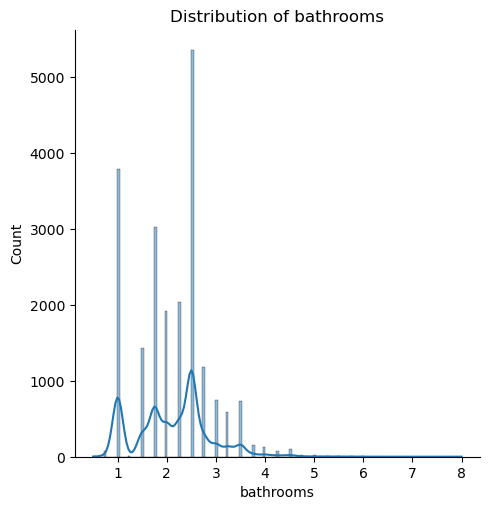

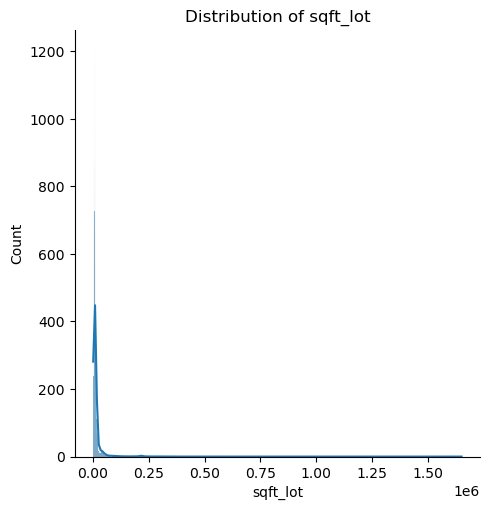

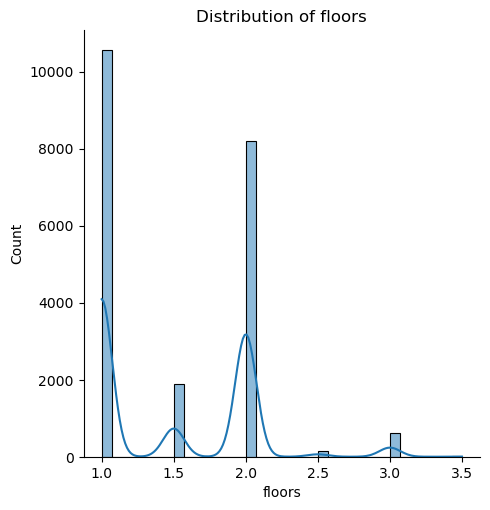

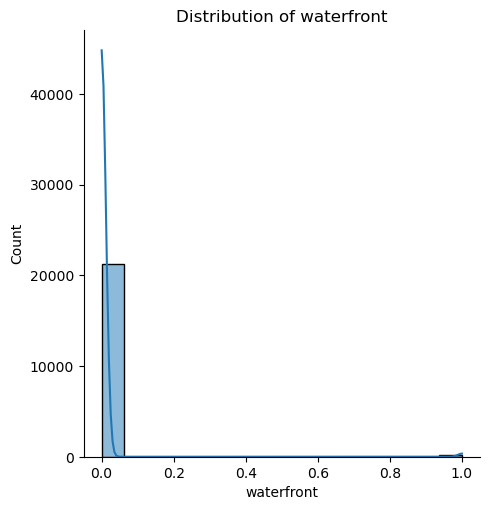

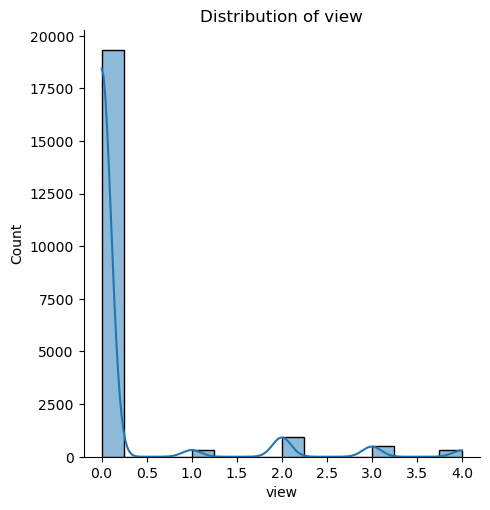

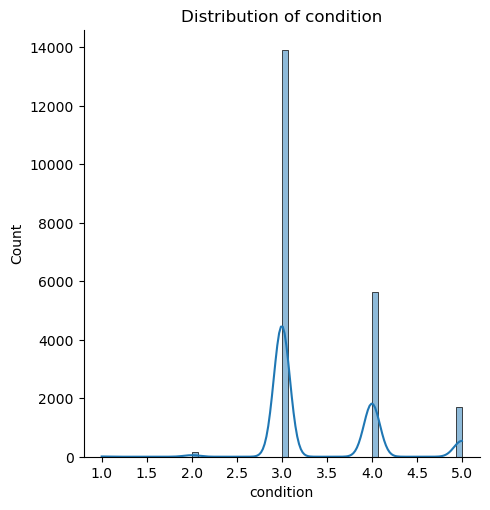

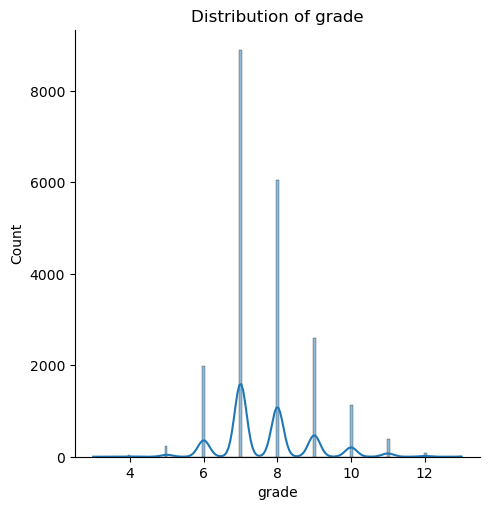

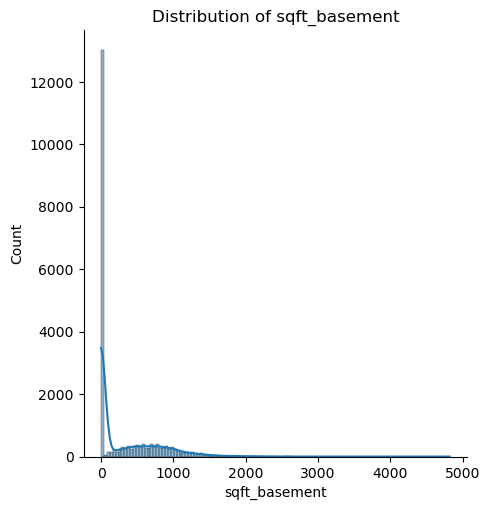

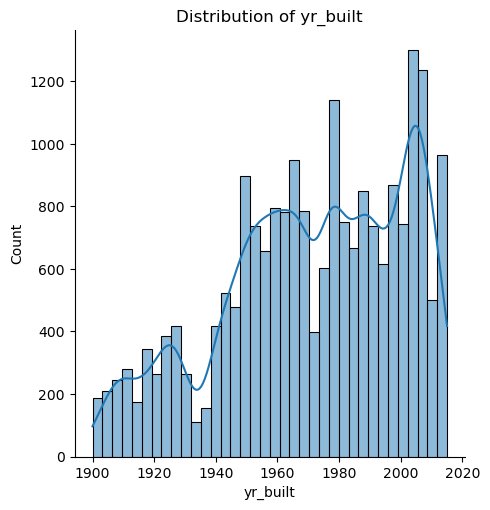

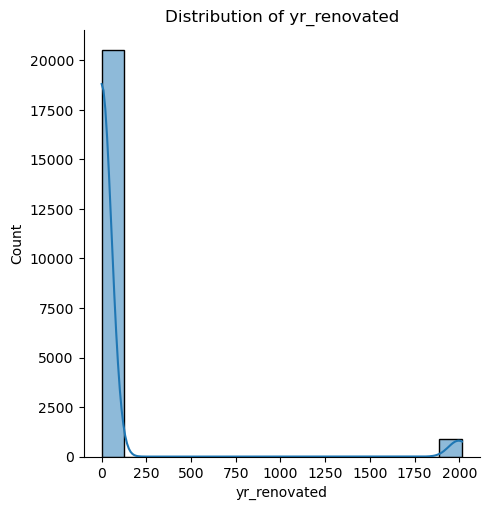

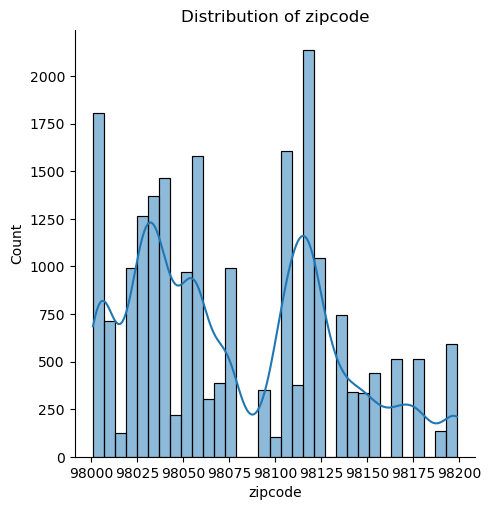

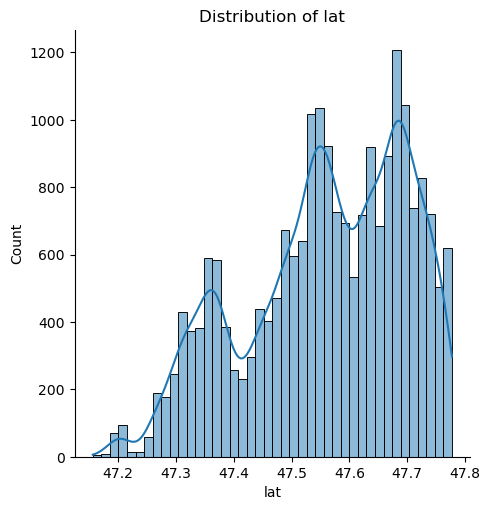

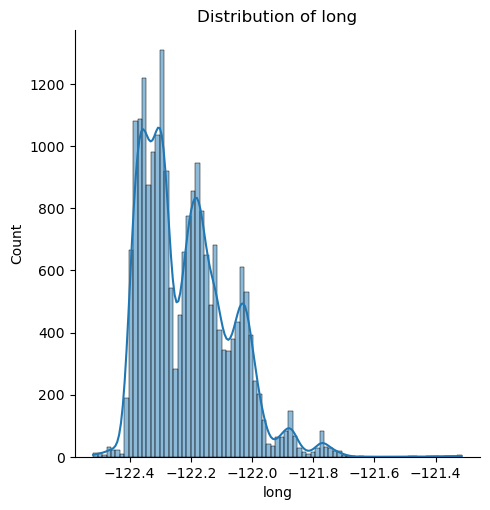

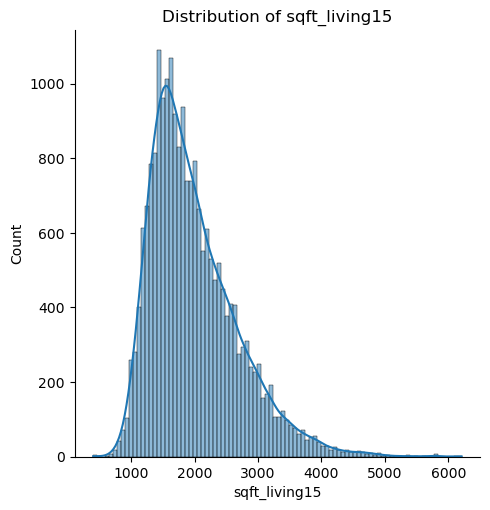

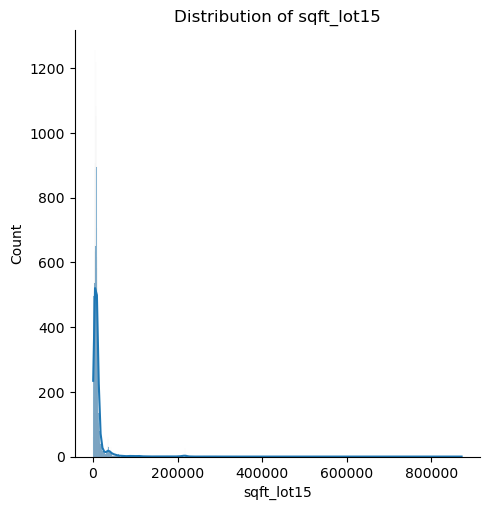

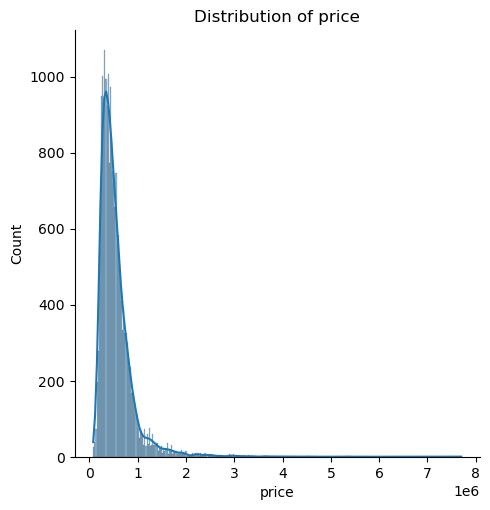

In [731]:
# Iteramos sobre cada columna del DataFrame df3
for column in df3.columns:
    
    # Creamos y mostramos un gráfico de distribución (histograma con KDE) para la columna actual
    sns.displot(df3[column], kde=True)
    
    # Establecemos el título del gráfico con el nombre de la columna
    plt.title(f"Distribution of {column}")
    
    # Mostramos el gráfico
    plt.show()

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


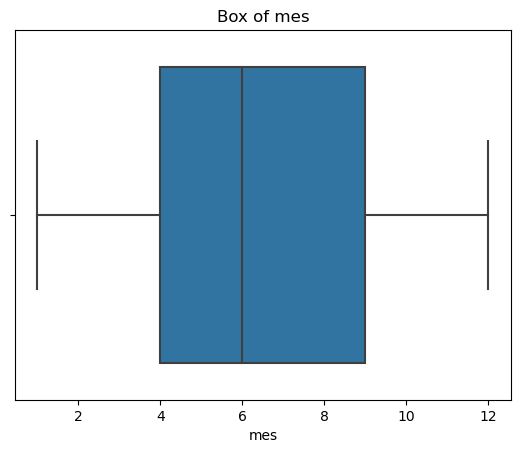

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


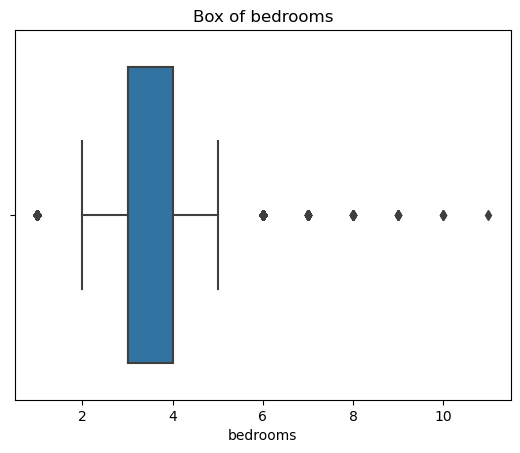

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


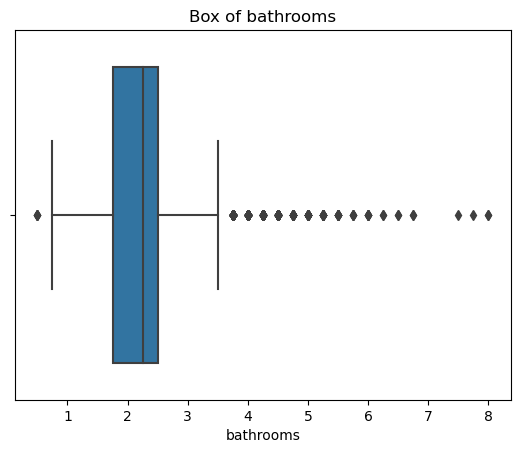

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


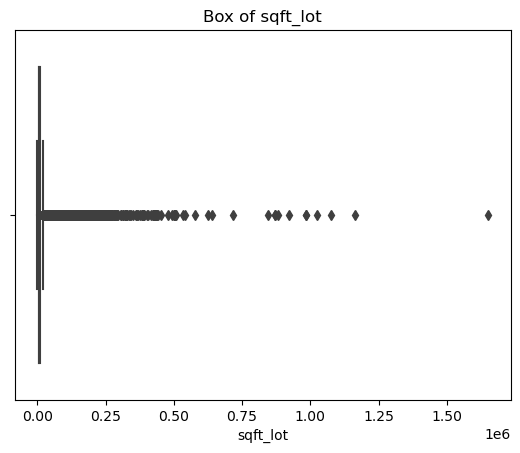

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


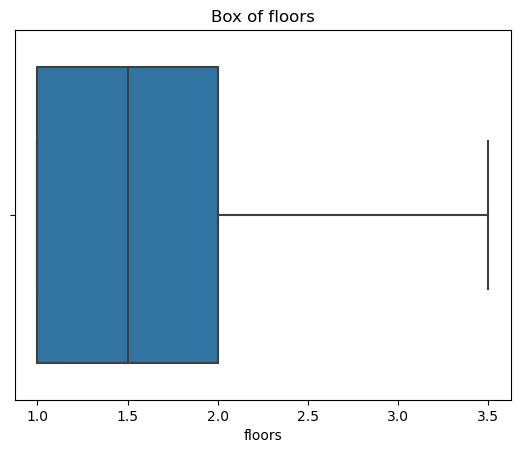

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


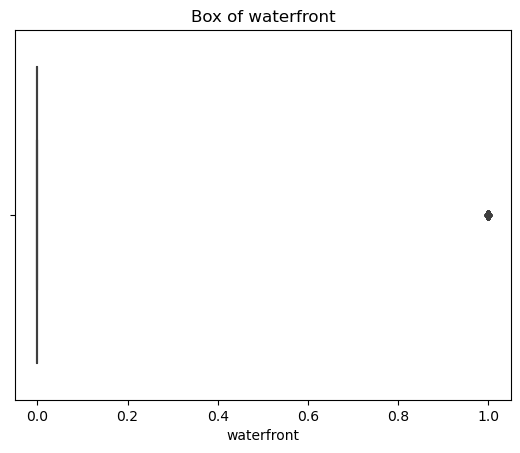

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


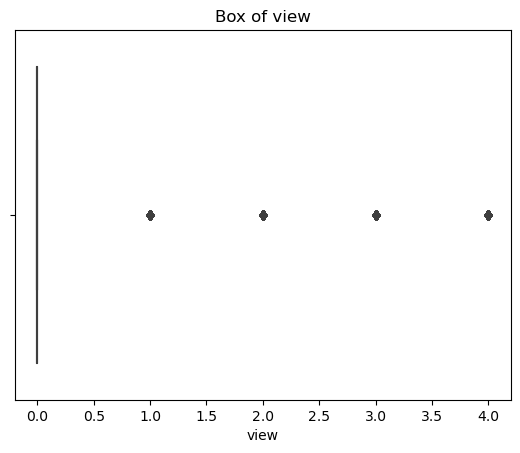

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


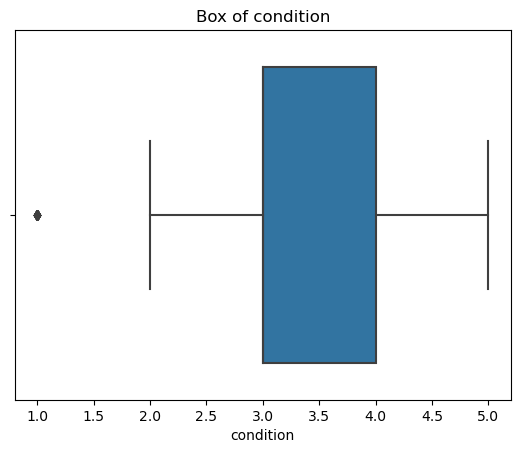

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


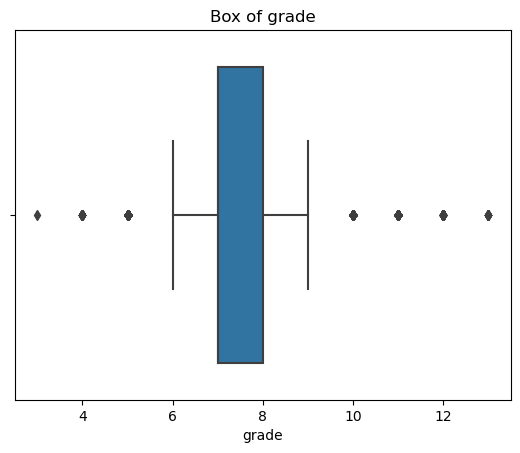

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


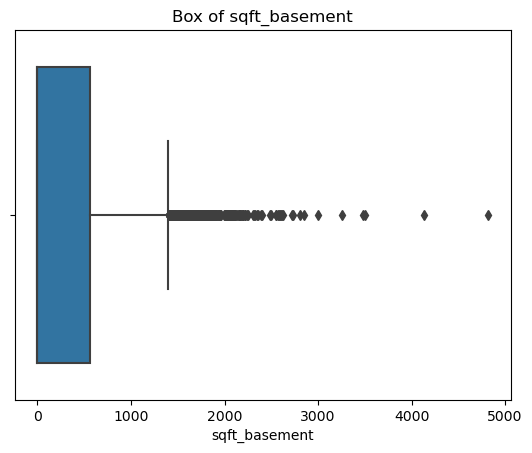

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


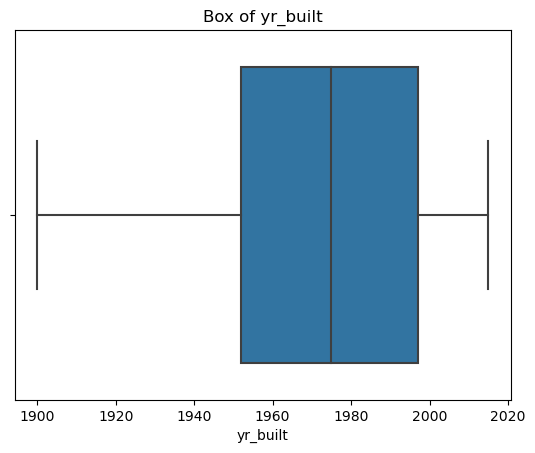

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


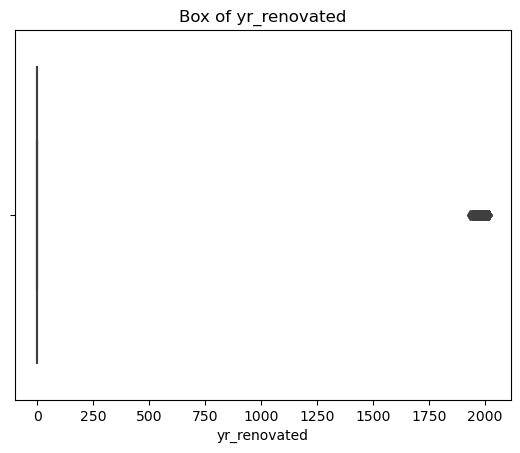

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


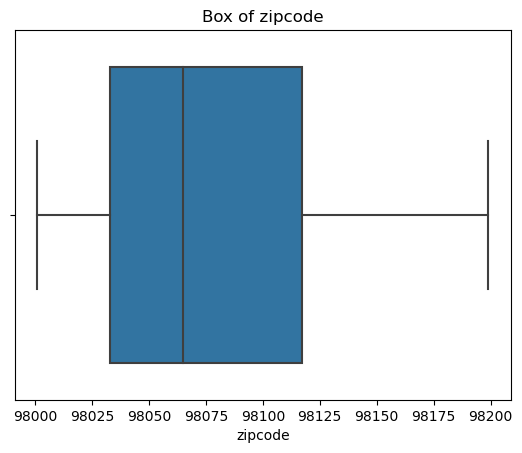

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


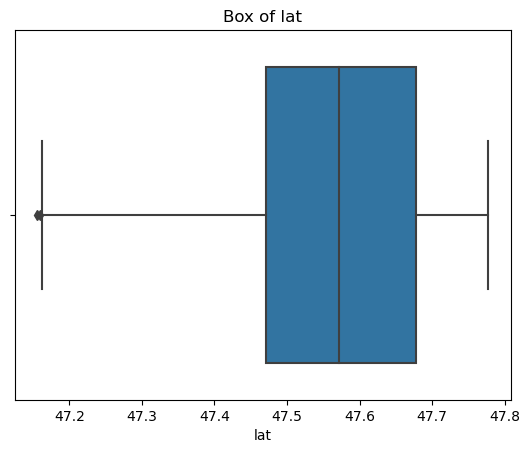

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


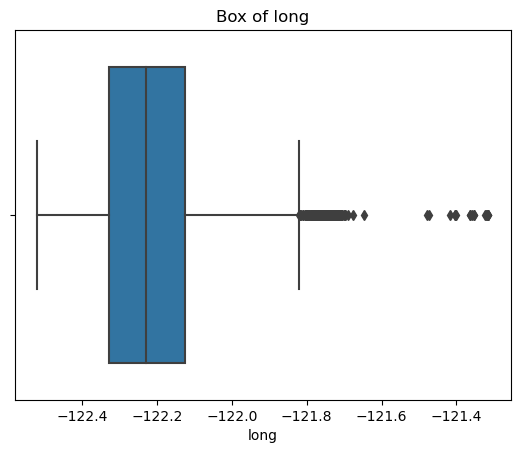

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


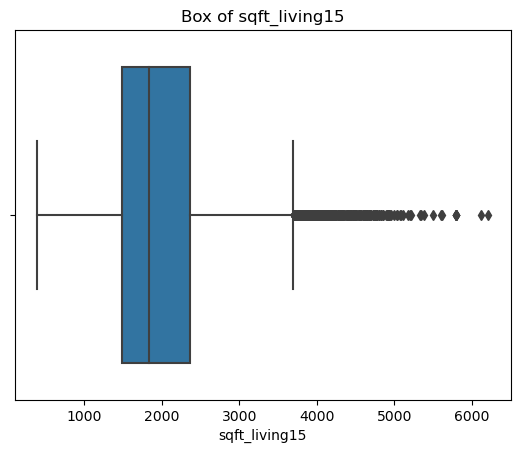

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


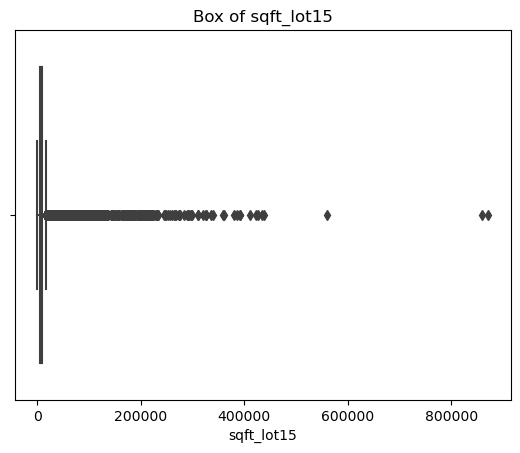

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


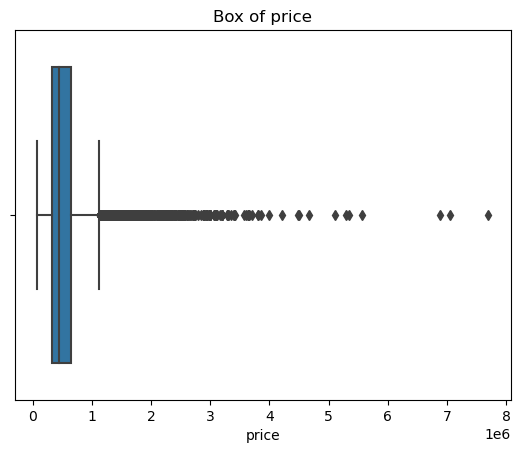

In [732]:
# Iteramos sobre cada columna del DataFrame df3
for column in df3.columns:
    
    # Creamos y mostramos un gráfico de caja (boxplot) para la columna actual
    sns.boxplot(df3[column])
    
    # Establecemos el título del gráfico con el nombre de la columna
    plt.title(f"Box of {column}")
    
    # Mostramos el gráfico
    plt.show()

Observamos que la mayoría de los datos no siguen una distribución normal y, al utilizar el gráfico de caja (boxplot), es evidente que algunas variables presentan numerosos valores atípicos (outliers).

In [733]:
# Calcular los límites superior e inferior para identificar los outliers
Q1 = df3['price'].quantile(0.25)
Q3 = df3['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar los outliers en la columna "Price"
outliers_count = len(df3[(df3['price'] < lower_bound) | (df3['price'] > upper_bound)])

# Imprimir el número de outliers
print("Número de outliers:", outliers_count, lower_bound, upper_bound)

Número de outliers: 1152 -155125.0 1125075.0


In [734]:
# Como la cantidad de outliers un muy baja elimino los valores superiores al 0.75 e inferiores a 0.25

# Filtramos y eliminamos los outliers de la columna "price"
df4 = df3.drop(df3[(df3['price'] < lower_bound) | (df3['price'] > upper_bound)].index)

df4.shape

(20267, 18)

In [735]:
# Ejecutamos la funcion para el DataFrame (df4) modificado
regression_metrics(df4, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2585.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:40   Log-Likelihood:            -2.6519e+05
No. Observations:               20267   AIC:                         5.304e+05
Df Residuals:                   20249   BIC:                         5.306e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.508e+06   1.75e+06     -3.140

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


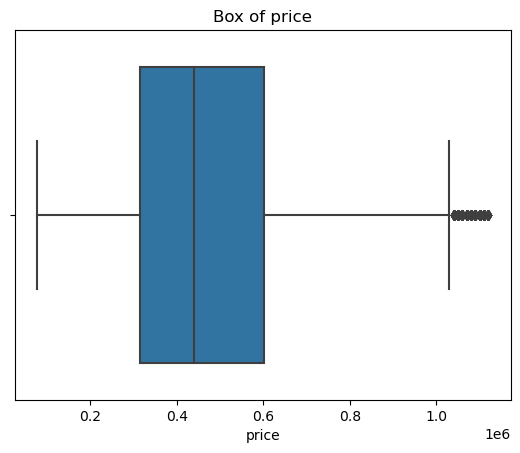

In [736]:
# Creamos y mostramos un gráfico de caja (boxplot) para la columna'price'
sns.boxplot(df4['price'])

# Establecemos el título del gráfico con el nombre de la columna
plt.title(f"Box of {'price'}")

# Mostramos el gráfico
plt.show()

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


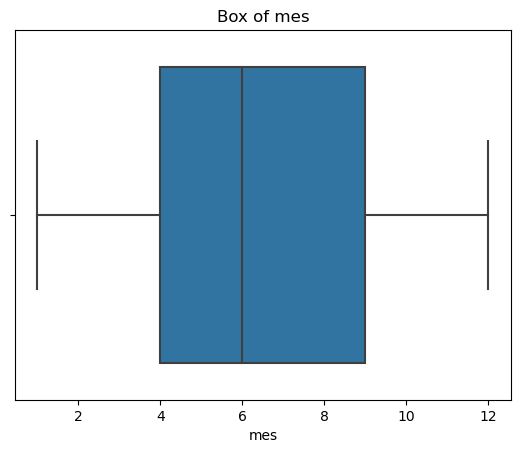

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


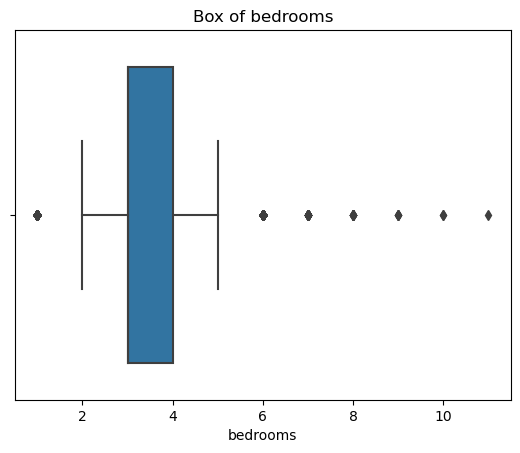

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


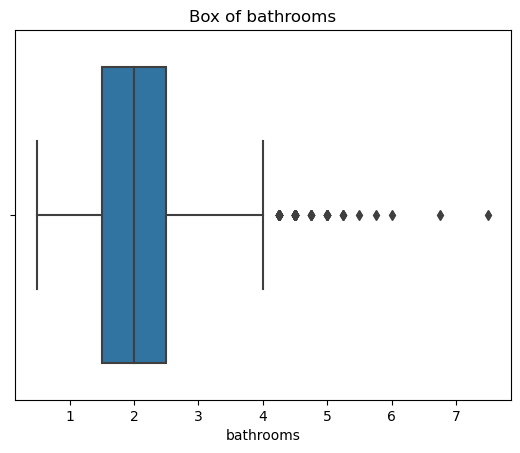

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


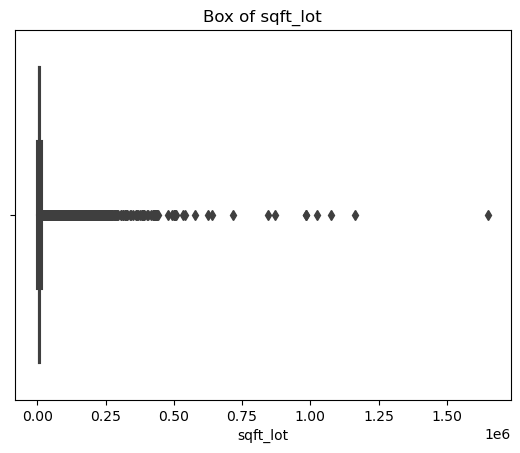

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


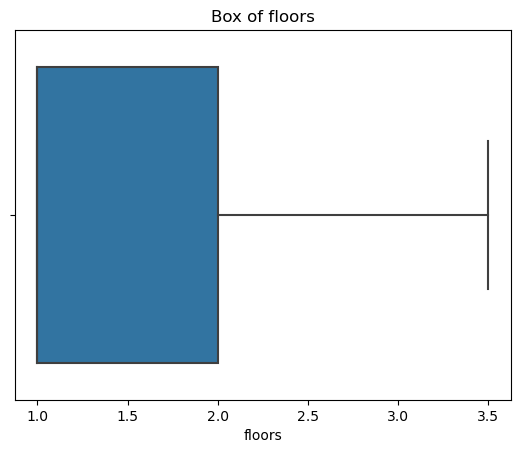

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


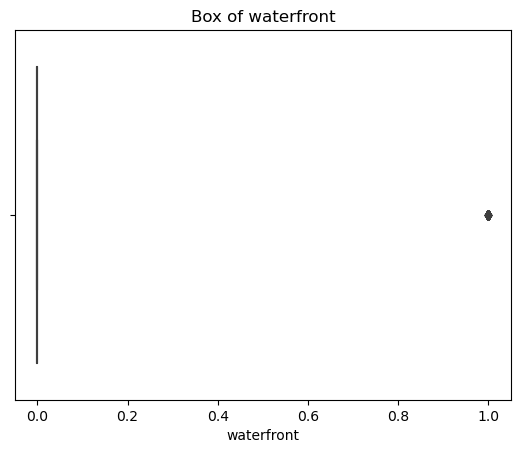

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


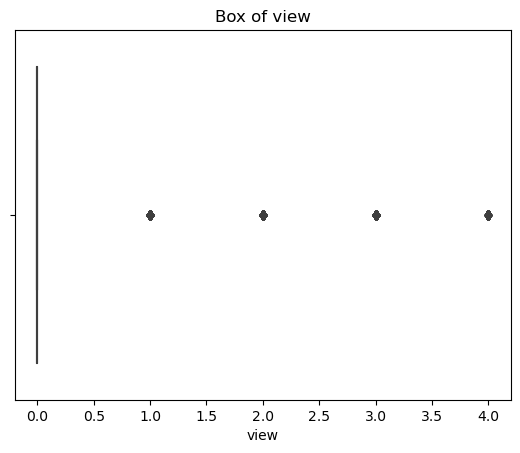

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


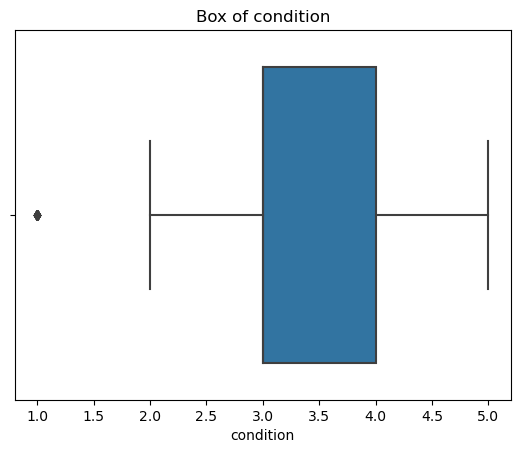

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


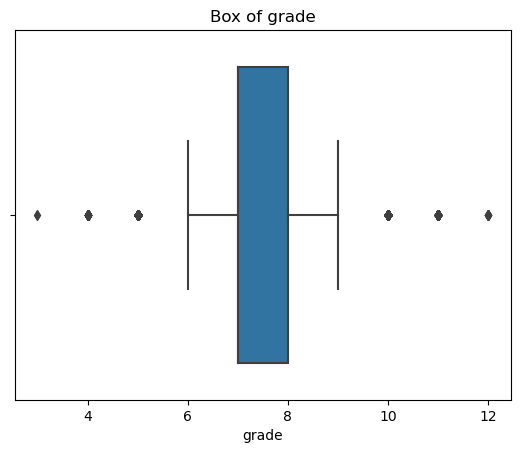

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


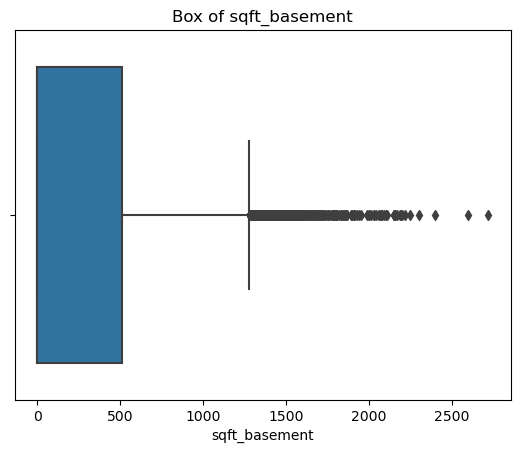

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


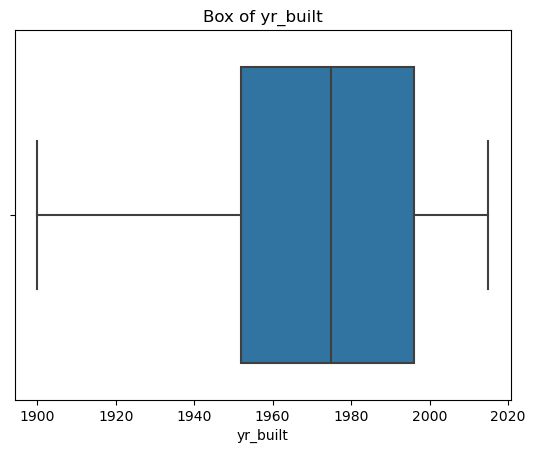

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


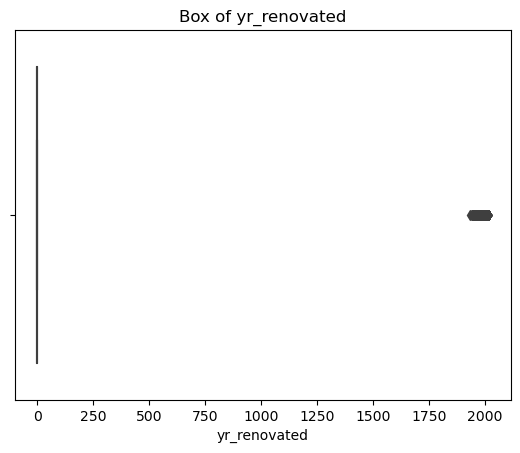

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


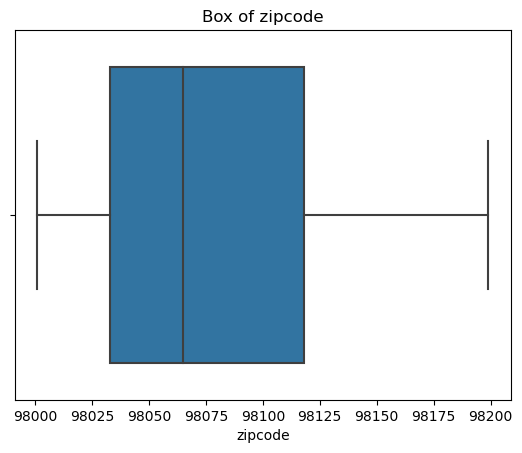

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


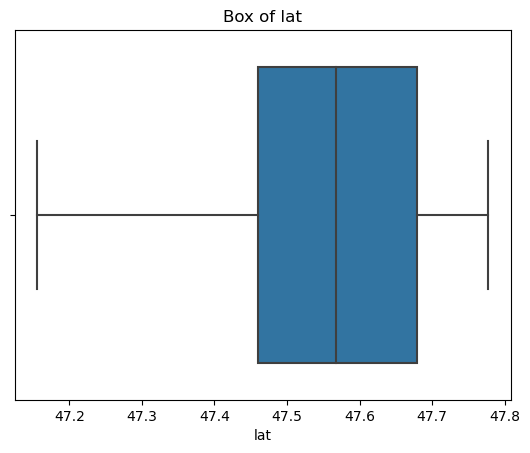

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


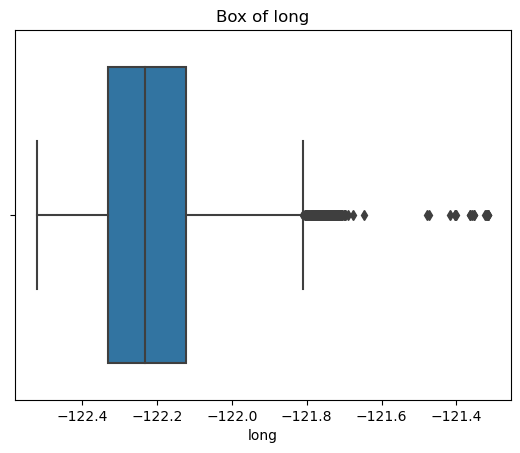

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


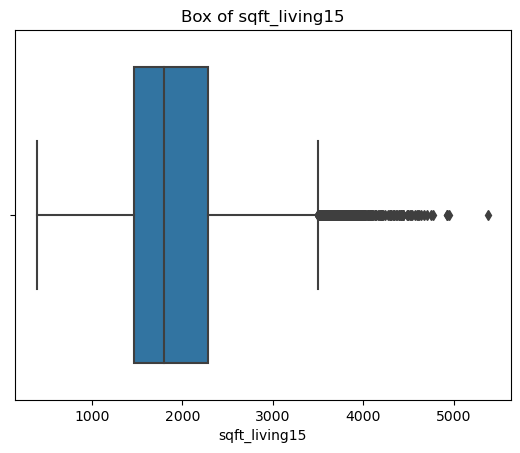

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


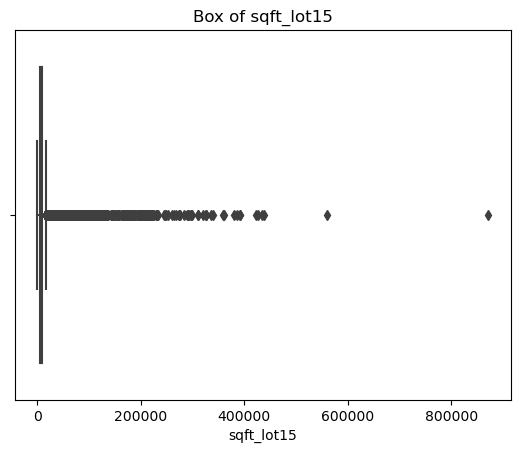

c:\Users\aguva\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


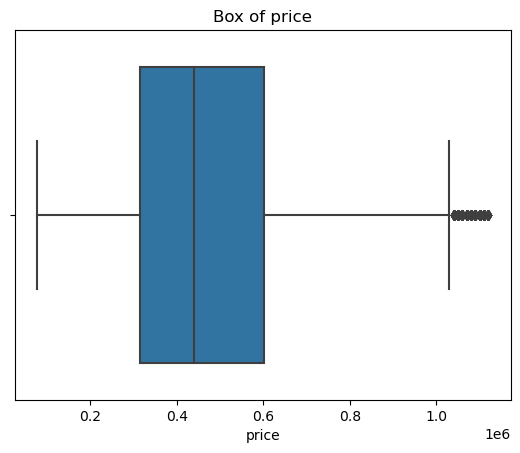

In [737]:
# Iteramos sobre cada columna del DataFrame df4
for column in df4.columns:
    
    # Creamos y mostramos un gráfico de distribución (histograma con KDE) para la columna actual
    sns.boxplot(df4[column])
    
    # Establecemos el título del gráfico con el nombre de la columna
    plt.title(f"Box of {column}")
    
    # Mostramos el gráfico
    plt.show()

In [738]:
# Lista de columnas que voy a eliminar sus outliers
columns_to_process = ['bedrooms', 'bathrooms', 'sqft_lot', 'condition', 'grade', 'long', 'sqft_lot15']

# Defino los límites para eliminar outliers (percentiles 0.20 y 0.80)
lower_bound = 0.20
upper_bound = 0.80

# Función para eliminar outliers de una columna específica
def remove_outliers(df, column, lower_bound, upper_bound):
    lower_bound_value = df[column].quantile(lower_bound)
    upper_bound_value = df[column].quantile(upper_bound)
    return df[(df[column] >= lower_bound_value) & (df[column] <= upper_bound_value)]

# Iterar sobre cada columna y eliminar outliers
for column in columns_to_process:
    df5 = remove_outliers(df4, column, lower_bound, upper_bound)

# Verificar el nuevo tamaño del DataFrame después de eliminar outliers
print(df5.shape)
df5

(12164, 18)


,mes,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,10,3,1.00,5650,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,12,3,2.25,7242,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,2,1.00,10000,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,12,4,3.00,5000,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,2,3,2.00,8080,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21583,9,4,3.00,7838,2.0,0,0,3,9,0,2003,0,98053,47.6857,-122.046,3370,6814,810000
21587,8,3,2.50,5536,2.0,0,0,3,8,0,2003,0,98065,47.5389,-121.881,2270,5731,507250
21589,10,4,2.50,6023,2.0,0,0,3,9,0,2014,0,98056,47.5137,-122.167,2520,6023,610685
21590,3,4,3.50,7200,2.0,0,0,3,9,910,2009,0,98136,47.5537,-122.398,2050,6200,1010000


In [739]:
# Ejecutamos la funcion para el DataFrame (df5) modificado
regression_metrics(df5, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:41   Log-Likelihood:            -1.5852e+05
No. Observations:               12164   AIC:                         3.171e+05
Df Residuals:                   12146   BIC:                         3.172e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.283e+05    2.1e+06      0.252

### Escalamos

In [740]:
#Escalamos

transformer=StandardScaler().fit(df5)
df_sca= transformer.transform(df5)
print(df_sca.shape)
df_sca= pd.DataFrame(df_sca)

(12164, 18)


In [741]:
# Estableces los nuevos nombres de columnas en el DataFrame escalado
df3_col = df3.columns
df_sca.columns = df3_col

# Visualizas el DataFrame escalado
df_sca

,mes,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1.093135,-0.433741,-1.409405,-0.407664,-0.793094,-0.028684,-0.257712,-0.659100,-0.416963,-0.663964,-0.528122,-0.192574,1.763393,-0.246433,-0.264878,-0.930809,-1.114384,-1.120725
1,1.728817,-0.433741,0.376875,-0.143959,1.302301,-0.028684,-0.257712,-0.659100,-0.416963,0.329374,-0.677320,5.181204,0.818738,1.188465,-0.742954,-0.334364,0.105067,0.438080
2,-1.449596,-1.588992,-1.409405,0.312885,-0.793094,-0.028684,-0.257712,-0.659100,-1.447007,-0.663964,-1.348709,-0.192574,-0.910159,1.304050,-0.079816,1.420891,0.364407,-1.327349
3,1.728817,0.721509,1.448643,-0.515332,-0.793094,-0.028684,-0.257712,2.370293,-0.416963,1.595879,-0.155128,-0.192574,1.014798,-0.180775,-1.313561,-0.896727,-1.512897,0.763551
4,-1.449596,-0.433741,0.019619,-0.005150,-0.793094,-0.028684,-0.257712,-0.659100,0.613081,-0.663964,0.665459,-0.192574,-0.090270,0.475804,1.369833,-0.146909,0.021686,0.300002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12159,0.775293,0.721509,1.448643,-0.045236,1.302301,-0.028684,-0.257712,-0.659100,1.643125,-0.663964,1.262250,-0.192574,-0.464567,0.947035,1.362123,2.528576,-0.400738,1.779412
12160,0.457452,-0.433741,0.734131,-0.426547,1.302301,-0.028684,-0.257712,-0.659100,0.613081,-0.663964,1.262250,-0.192574,-0.250683,-0.056982,2.634422,0.654032,-1.064723,0.286441
12161,1.093135,0.721509,0.734131,-0.345879,1.302301,-0.028684,-0.257712,-0.659100,1.643125,-0.663964,1.672543,-0.192574,-0.411096,-0.229334,0.429103,1.080065,-0.885698,0.796517
12162,-1.131754,0.721509,2.163156,-0.150916,1.302301,-0.028684,-0.257712,-0.659100,1.643125,1.595879,1.486046,-0.192574,1.014798,0.044240,-1.352116,0.279124,-0.777180,2.765686


In [742]:
# Supongamos que tienes un DataFrame llamado 'df'
# y 'price' es la columna objetivo
regression_metrics(df_sca, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:41   Log-Likelihood:                -9880.7
No. Observations:               12164   AIC:                         1.980e+04
Df Residuals:                   12146   BIC:                         1.993e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.594e-15      0.005  -7.27e-13

### Normalizamos

In [743]:
# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el MinMaxScaler a los datos
scaler.fit(df5)

# Aplicar la normalización Min-Max
df_norm = scaler.transform(df5)

# El normalized_data es un NumPy array
df_norm= pd.DataFrame(df_norm)


In [744]:
# Estableces los nuevos nombres de columnas en el DataFrame escalado
df3_col = df3.columns
df_norm.columns = df3_col

# Visualizas el DataFrame escalado
df_norm

,mes,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,0.818182,0.2,0.095238,0.017047,0.0,0.0,0.0,0.5,0.428571,0.000000,0.478261,0.000000,0.893939,0.547016,0.187931,0.166282,0.159314,0.138100
1,1.000000,0.2,0.333333,0.022582,0.5,0.0,0.0,0.5,0.428571,0.184332,0.443478,0.988089,0.626263,0.903758,0.134483,0.247113,0.490428,0.441459
2,0.090909,0.1,0.095238,0.032171,0.0,0.0,0.0,0.5,0.285714,0.000000,0.286957,0.000000,0.136364,0.932494,0.208621,0.484988,0.560846,0.097889
3,1.000000,0.3,0.476190,0.014787,0.0,0.0,0.0,1.0,0.428571,0.419355,0.565217,0.000000,0.681818,0.563340,0.070690,0.170901,0.051107,0.504798
4,0.090909,0.2,0.285714,0.025495,0.0,0.0,0.0,0.5,0.571429,0.000000,0.756522,0.000000,0.368687,0.726577,0.370690,0.272517,0.467788,0.414587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12159,0.727273,0.3,0.476190,0.024654,0.5,0.0,0.0,0.5,0.714286,0.000000,0.895652,0.000000,0.262626,0.843734,0.369828,0.635104,0.353088,0.702495
12160,0.636364,0.2,0.380952,0.016650,0.5,0.0,0.0,0.5,0.571429,0.000000,0.895652,0.000000,0.323232,0.594117,0.512069,0.381062,0.172798,0.411948
12161,0.818182,0.3,0.380952,0.018344,0.5,0.0,0.0,0.5,0.714286,0.000000,0.991304,0.000000,0.277778,0.551267,0.265517,0.438799,0.221408,0.511214
12162,0.181818,0.3,0.571429,0.022436,0.5,0.0,0.0,0.5,0.714286,0.419355,0.947826,0.000000,0.681818,0.619282,0.066379,0.330254,0.250874,0.894434


In [745]:
# Supongamos que tienes un DataFrame llamado 'df'
# y 'price' es la columna objetivo
regression_metrics(df_sca, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:41   Log-Likelihood:                -9880.7
No. Observations:               12164   AIC:                         1.980e+04
Df Residuals:                   12146   BIC:                         1.993e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.594e-15      0.005  -7.27e-13

Test size: 0.4, MSE: 0.30850561789329917
Test size: 0.4, RMSE: 0.5554328203242037
Test size: 0.4, R2: 0.7010952551501195
Test size: 0.4, Adjusted R2: 0.6999852313400725
----------------------------------
Test size: 0.3, MSE: 0.3008657384202319
Test size: 0.3, RMSE: 0.5485122955962172
Test size: 0.3, R2: 0.708577729921269
Test size: 0.3, Adjusted R2: 0.7071330587944672
----------------------------------
Test size: 0.2, MSE: 0.2835711649679411
Test size: 0.2, RMSE: 0.5325140044805781
Test size: 0.2, R2: 0.7207141122212795
Test size: 0.2, Adjusted R2: 0.7186316159578092
----------------------------------
Test size: 0.1, MSE: 0.29754083888846145
Test size: 0.1, RMSE: 0.5454730413947709
Test size: 0.1, R2: 0.7144418339184858
Test size: 0.1, Adjusted R2: 0.7101513105549906
----------------------------------


In [746]:
# Aplicamos la función regression_metrics en el DataFrame normalizado

regression_metrics(df_norm, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     1689.
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:58:41   Log-Likelihood:                 10029.
No. Observations:               12164   AIC:                        -2.002e+04
Df Residuals:                   12146   BIC:                        -1.989e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2019      0.008    -25.222

### Análisis de los inmuebles mayores a 650K 

In [747]:
df_650= df[df['price'] > 650000]

# Mostrar el resultado
df_650



,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5,7237550310,5,2014,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
10,1736800520,4,2015,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
21,2524049179,8,2014,3,2.75,3050,44867,1.0,0,4,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
26,1794500383,6,2014,3,1.75,2450,2691,2.0,0,0,...,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000
27,3303700376,12,2014,3,1.00,1400,1581,1.5,0,0,...,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,8,2014,5,2.75,3600,9437,2.0,0,0,...,3600,0,2014,0,98059,47.4822,-122.131,3550,9421,679950
21581,191100405,4,2015,4,3.25,3410,10125,2.0,0,0,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,1580000
21583,7202300110,9,2014,4,3.00,3990,7838,2.0,0,0,...,3990,0,2003,0,98053,47.6857,-122.046,3370,6814,810000
21584,249000205,10,2014,5,3.75,4470,8088,2.0,0,0,...,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,1540000


In [748]:

# Verificamos si la columna 'id' tiene valores duplicados

duplicados = df_650.duplicated(subset='id', keep=False)

# Filtra el DataFrame original para mostrar solo las filas duplicadas
duplicados2 = df_650[duplicados]

duplicados2

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price


In [749]:
# Lista con los nombres de las columnas
lista_columnas = df_650.columns.tolist()

print(lista_columnas)

['id', 'mes', 'anio', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price']


In [751]:
df_650

,id,mes,anio,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
5,7237550310,5,2014,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,1230000
10,1736800520,4,2015,3,2.50,3560,9796,1.0,0,0,...,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925,662500
21,2524049179,8,2014,3,2.75,3050,44867,1.0,0,4,...,2330,720,1968,0,98040,47.5316,-122.233,4110,20336,2000000
26,1794500383,6,2014,3,1.75,2450,2691,2.0,0,0,...,1750,700,1915,0,98119,47.6386,-122.360,1760,3573,937000
27,3303700376,12,2014,3,1.00,1400,1581,1.5,0,0,...,1400,0,1909,0,98112,47.6221,-122.314,1860,3861,667000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21580,7502800100,8,2014,5,2.75,3600,9437,2.0,0,0,...,3600,0,2014,0,98059,47.4822,-122.131,3550,9421,679950
21581,191100405,4,2015,4,3.25,3410,10125,2.0,0,0,...,3410,0,2007,0,98040,47.5653,-122.223,2290,10125,1580000
21583,7202300110,9,2014,4,3.00,3990,7838,2.0,0,0,...,3990,0,2003,0,98053,47.6857,-122.046,3370,6814,810000
21584,249000205,10,2014,5,3.75,4470,8088,2.0,0,0,...,4470,0,2008,0,98004,47.6321,-122.200,2780,8964,1540000


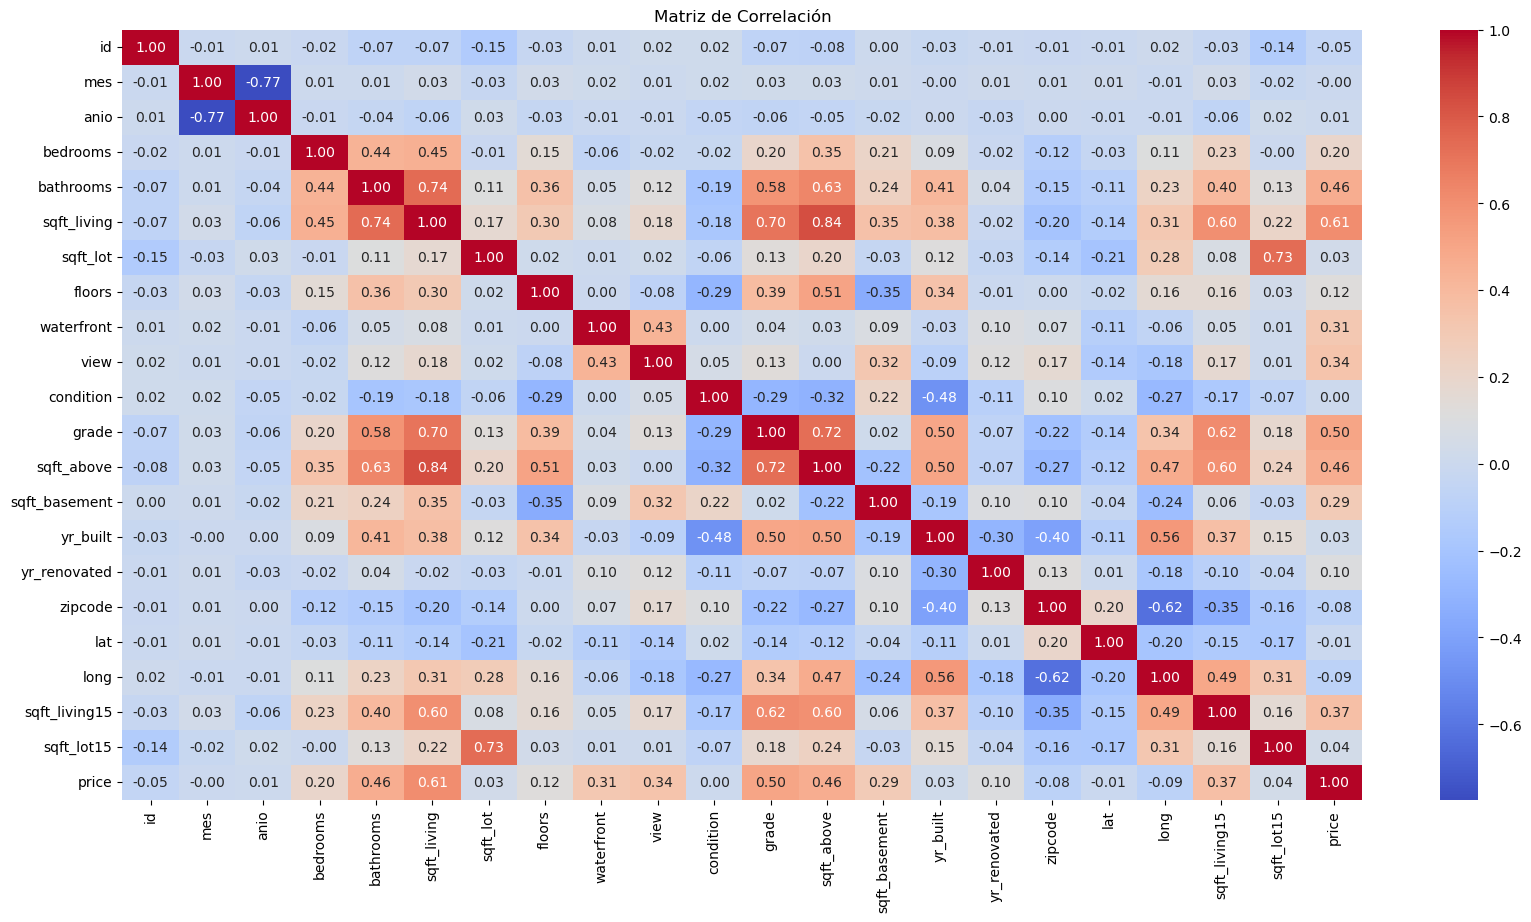

In [752]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix = df_650.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [753]:
data_corr = df_650.copy()

data_corr.drop(columns=['price'], inplace=True)
vif = {}
data_corr = add_constant(data_corr)
for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif_df = pd.DataFrame(vif.items(), columns=['Variable', 'VIF'])
print(vif_df)


         Variable       VIF
0           const  0.000000
1              id  1.040824
2             mes  2.502422
3            anio  2.525721
4        bedrooms  1.424710
5       bathrooms  2.686004
6     sqft_living       inf
7        sqft_lot  2.268310
8          floors  1.716218
9      waterfront  1.248685
10           view  1.534838
11      condition  1.522678
12          grade  2.867296
13     sqft_above       inf
14  sqft_basement       inf
15       yr_built  2.602110
16   yr_renovated  1.294183
17        zipcode  1.784081
18            lat  1.129660
19           long  2.705215
20  sqft_living15  2.322139
21     sqft_lot15  2.251390


c:\Users\aguva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\aguva\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Resulta en un valor "inf" o infinito, significa que hay una alta multicolinealidad entre la variable en cuestión y al menos una de las otras variables independientes en el modelo. La multicolinealidad ocurre cuando dos o más variables independientes están altamente correlacionadas entre sí. Procedemos a eliminar 'sqft_above' y 'sqft_basement'

In [754]:
data_corr2 = df_650.copy()

data_corr2.drop(columns=['id', 'mes', 'anio', 'price', 'sqft_living', 'sqft_lot', 'lat', 'long'], inplace=True)
vif = {}
data_corr2 = add_constant(data_corr2)
for i in np.arange(data_corr2.shape[1]):
    column_name = data_corr2.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value

vif_df = pd.DataFrame(vif.items(), columns=['Variable', 'VIF'])
print(vif_df)

         Variable       VIF
0           const  0.000000
1        bedrooms  1.040824
2       bathrooms  2.502422
3          floors  2.525721
4      waterfront  1.424710
5            view  2.686004
6       condition       inf
7           grade  2.268310
8      sqft_above  1.716218
9   sqft_basement  1.248685
10       yr_built  1.534838
11   yr_renovated  1.522678
12        zipcode  2.867296
13  sqft_living15       inf
14     sqft_lot15       inf


c:\Users\aguva\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
c:\Users\aguva\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [757]:
# Eliminamos las variables que no tiene relacion directa

#Eliminamos la variable sqft_living, 'id', 'anio'

df_dup_650 = df_650.drop(['id', 'mes', 'anio', 'sqft_living', 'sqft_lot', 'lat', 'long'], axis=1)

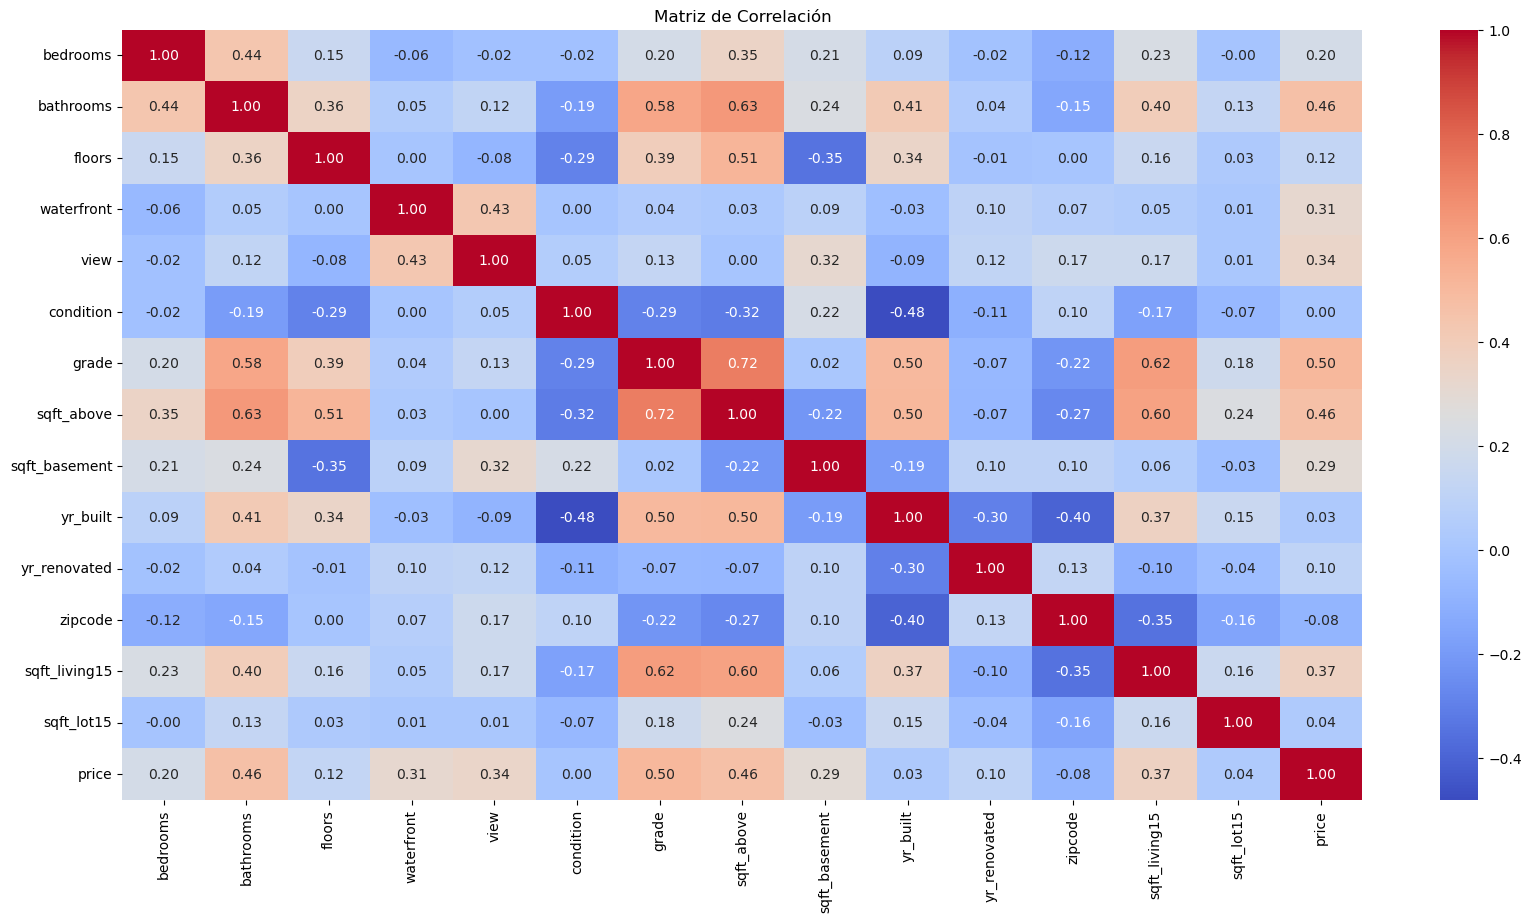

In [758]:
# Creamos una tabla de correlatividad para conocer el comportamiento de los datos

corr_matrix3 = df_dup_650.corr()

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 10))

# Cambiamos el mapa de colores (cmap) para mejorar la visualización
sns.heatmap(corr_matrix3, annot=True, cmap='coolwarm', fmt='.2f')

# Agregar título al heatmap
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

In [760]:
# Aplicamos la función regression_metrics en el DataFrame normalizado

regression_metrics(df_dup_650, 'price')

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     449.9
Date:                Sat, 29 Jul 2023   Prob (F-statistic):               0.00
Time:                        03:07:37   Log-Likelihood:                -73173.
No. Observations:                5188   AIC:                         1.464e+05
Df Residuals:                    5173   BIC:                         1.465e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.03e+08   1.04e+07      9.928

### Conclusión
Luego de eliminar los outliers, observamos una mejora significativa en el coeficiente R2 del modelo. Al aplicar las técnicas de escalado y normalización para reducir la desviación estándar y la varianza, notamos una optimización más efectiva. 

Ambos modelos muestran un rendimiento similar, con un R-squared y Adjusted R-squared de aproximadamente 70.3%, lo que indica que alrededor del 70% de la variabilidad en el precio se explica mediante las variables consideradas.

Sin embargo, al examinar más detenidamente los modelos, notamos algunas diferencias importantes. El primer modelo tiene coeficientes muy pequeños y no significativos para algunas variables, mientras que el segundo modelo muestra coeficientes más significativos y fáciles de interpretar.

Además, al evaluar la precisión de las predicciones, observamos que el segundo modelo tiene un Mean Squared Error (MSE) y un Root Mean Squared Error (RMSE) más bajos. Esto indica que las predicciones del segundo modelo tienen un menor error en promedio y son más cercanas a los valores reales de los precios de las viviendas.

Por lo tanto, con base en la interpretación de los coeficientes y las métricas de evaluación, podemos concluir que el segundo modelo es más adecuado para nuestro proyecto. Ofrece resultados más interpretables y precisos, lo que lo convierte en una opción preferible para predecir los precios de las viviendas en nuestro análisis. Con este modelo seleccionado, esperamos tomar decisiones informadas y obtener una mejor comprensión del mercado inmobiliario.

Con estos avances, reforzamos la importancia del preprocesamiento adecuado de los datos y cómo este proceso puede impactar significativamente en el rendimiento y precisión del modelo de regresión. Debemos seguir trabajando en el mejoramiento del modelo.

Para finalizar al analizar las variables que tienen mayor incidencia en el precio de los inmuebles mayores a 650.000 USD, podemos destacar las siguientes:

Waterfront: Un aumento de una unidad en la variable "waterfront" (propiedad con vista al agua) se asocia con un aumento de aproximadamente $632,100 en el precio de la propiedad.

Grade: Un aumento de una unidad en la variable "grade" (calidad de la construcción) se asocia con un aumento de aproximadamente $117,700 en el precio de la propiedad.

Sqft_Above: Un aumento de una unidad en el área de la propiedad por encima del nivel del suelo ("sqft_above") se asocia con un aumento de aproximadamente $227.

Sqft_Basement: Un aumento de una unidad en el área del sótano de la propiedad ("sqft_basement") se asocia con un aumento de aproximadamente $209 en el precio de la propiedad.

View: Un aumento de una unidad en la variable "view" (vista de la propiedad) se asocia con un aumento de aproximadamente $44,800 en el precio de la propiedad.



